In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rfo-data/RFLFSODataFull.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/kaggle/input/rfo-data/RFLFSODataFull.csv')
data = pd.read_csv('/kaggle/input/rfo-data/RFLFSODataFull.csv')

In [10]:
features = df.columns[2:]
print(features)

Index(['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin',
       'Distance', 'Frequency', 'Particulate', 'ParticulateMax',
       'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'],
      dtype='object')


In [11]:
df.head()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91379 entries, 0 to 91378
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                91379 non-null  float64
 1   RFL_Att                91379 non-null  float64
 2   AbsoluteHumidity       91379 non-null  float64
 3   AbsoluteHumidityMax    91379 non-null  float64
 4   AbsoluteHumidityMin    91379 non-null  float64
 5   Distance               91379 non-null  float64
 6   Frequency              91379 non-null  int64  
 7   Particulate            91379 non-null  float64
 8   ParticulateMax         91379 non-null  float64
 9   ParticulateMin         91379 non-null  float64
 10  RainIntensity          91379 non-null  float64
 11  RainIntensityMax       91379 non-null  float64
 12  RainIntensityMin       91379 non-null  float64
 13  RelativeHumidity       91379 non-null  float64
 14  SYNOPCode              91379 non-null  int64  
 15  Te

In [13]:
df.describe()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
count,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,9.137900e+04,91379.000000,91379.000000,91379.000000,...,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000
mean,6.769458,11.619098,9.553919,10.032760,9.076251,3297.930328,7.850005e+10,27.065979,28.417120,25.717089,...,13.166020,11.904558,11.373193,32986.417484,34636.684647,31331.618978,89.043304,0.739065,1.851020,0.702242
std,3.903843,3.438873,5.858577,6.162798,5.575927,1224.305893,5.000027e+09,72.134023,75.761896,68.595239,...,9.589755,8.694028,6.942229,24713.874445,25978.845228,23497.873065,26.415610,0.871314,1.762698,0.828796
min,0.788363,0.027142,1.141556,1.238270,1.049744,2012.000148,7.350000e+10,0.000000,0.000000,0.000000,...,-6.693373,-7.270075,0.000000,10.151990,11.029667,9.484346,0.000000,0.000000,0.000000,0.000000
25%,3.473063,10.829331,4.958993,5.205861,4.709511,2019.431812,7.350000e+10,0.000000,0.000000,0.000000,...,4.905387,4.438425,5.000000,11158.598400,11721.447542,10588.793237,82.976727,0.076749,0.512667,0.072912
50%,6.336167,11.856560,6.870737,7.205499,6.524046,2959.863686,8.350000e+10,0.000000,0.000000,0.000000,...,10.803943,9.774467,11.000000,26378.636210,27686.214032,25047.188462,90.867362,0.437995,1.323101,0.416274
75%,8.664984,12.847944,14.049470,14.782679,13.379256,4820.890157,8.350000e+10,16.947618,17.775980,16.038090,...,22.470382,20.322434,17.000000,53493.821285,56092.212376,50797.690402,98.482652,1.088621,2.681788,1.036574
max,32.455222,46.893150,24.790883,26.407305,24.268431,4827.999971,8.350000e+10,1621.001906,1753.747866,1500.666382,...,40.771383,36.724191,23.000000,75004.999150,82503.130084,74999.343414,360.000000,7.799086,16.421115,7.252319


In [14]:
df.nunique()

FSO_Att                  91379
RFL_Att                  91041
AbsoluteHumidity         91378
AbsoluteHumidityMax      91379
AbsoluteHumidityMin      91379
Distance                 91252
Frequency                    2
Particulate              32102
ParticulateMax           32103
ParticulateMin           32103
RainIntensity            21914
RainIntensityMax         21915
RainIntensityMin         21915
RelativeHumidity         91194
SYNOPCode                    7
Temperature              91378
TemperatureDifference     3455
TemperatureMax           91379
TemperatureMin           91379
Time                        24
Visibility               91313
VisibilityMax            91379
VisibilityMin            91379
WindDirection            91041
WindSpeed                74445
WindSpeedMax             89136
WindSpeedMin             74447
dtype: int64

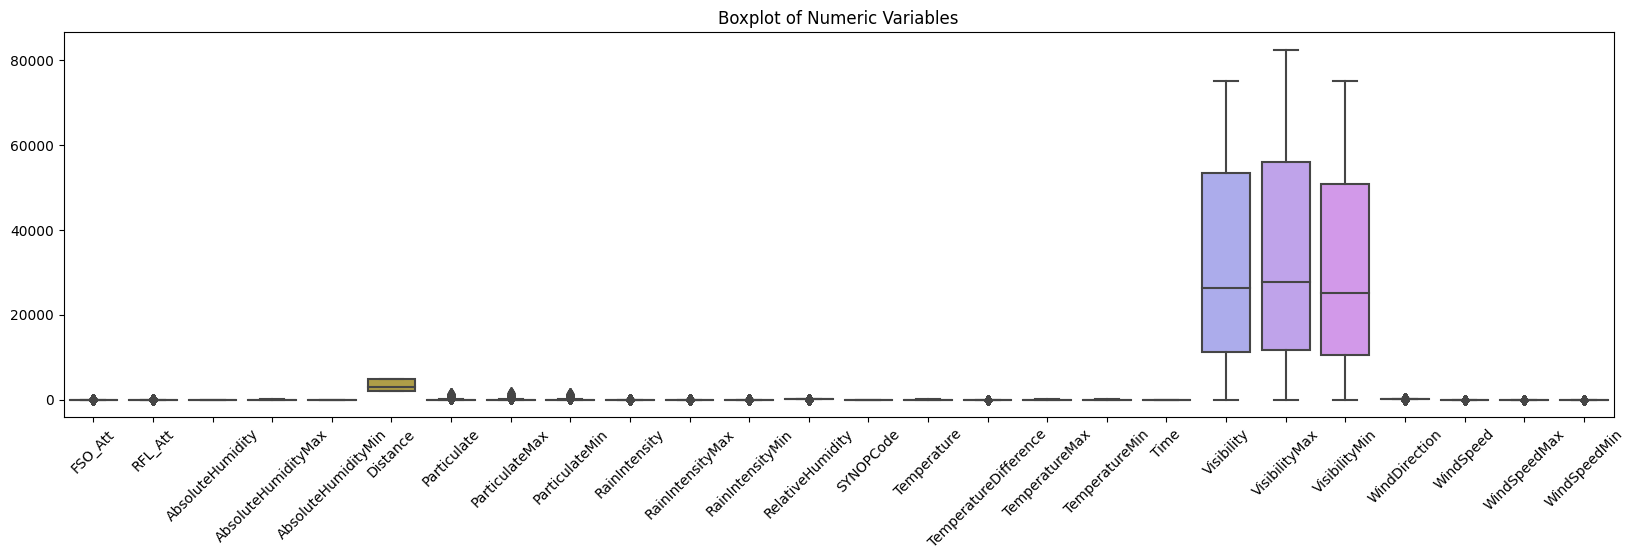

In [15]:
d = df.drop('Frequency',axis =1)
plt.figure(figsize=(20, 5))
sns.boxplot(data=d)
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Variables')
plt.show()

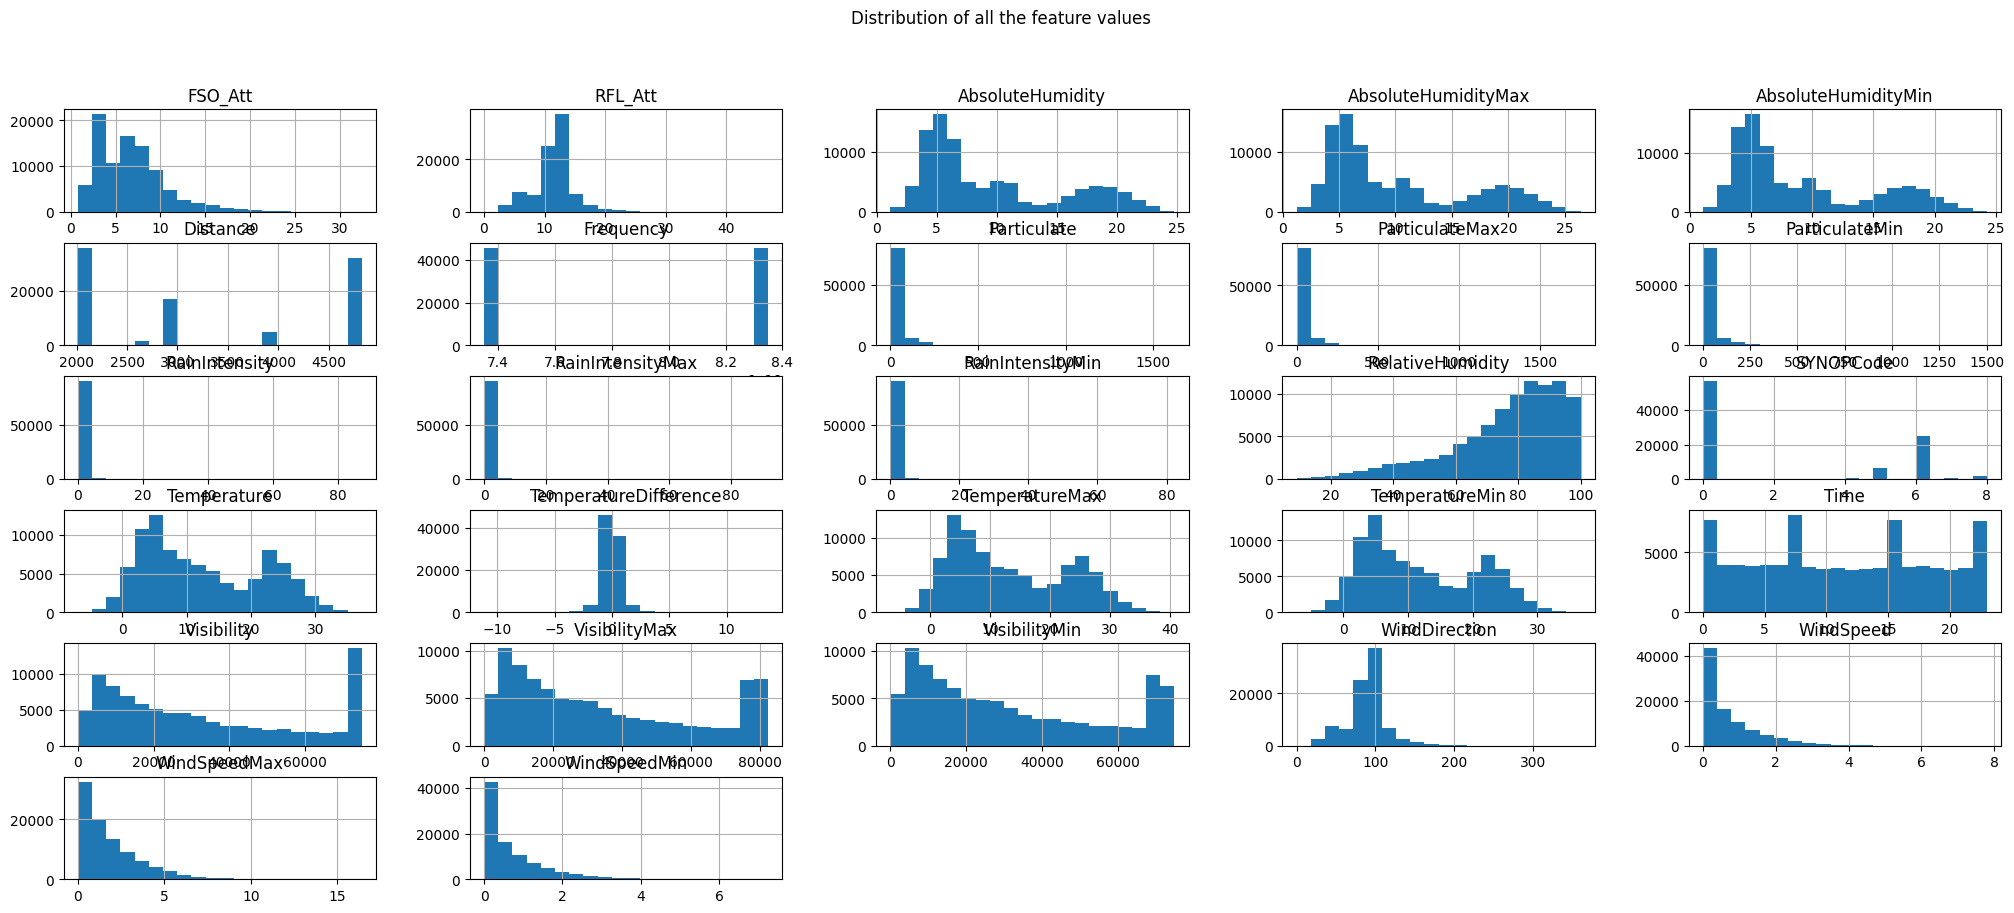

In [16]:
df.hist(figsize=(25, 10), bins=20)
plt.suptitle('Distribution of all the feature values')
plt.show()

## Method to remove highly correlated features
### Apply to Linear regression and Random forest

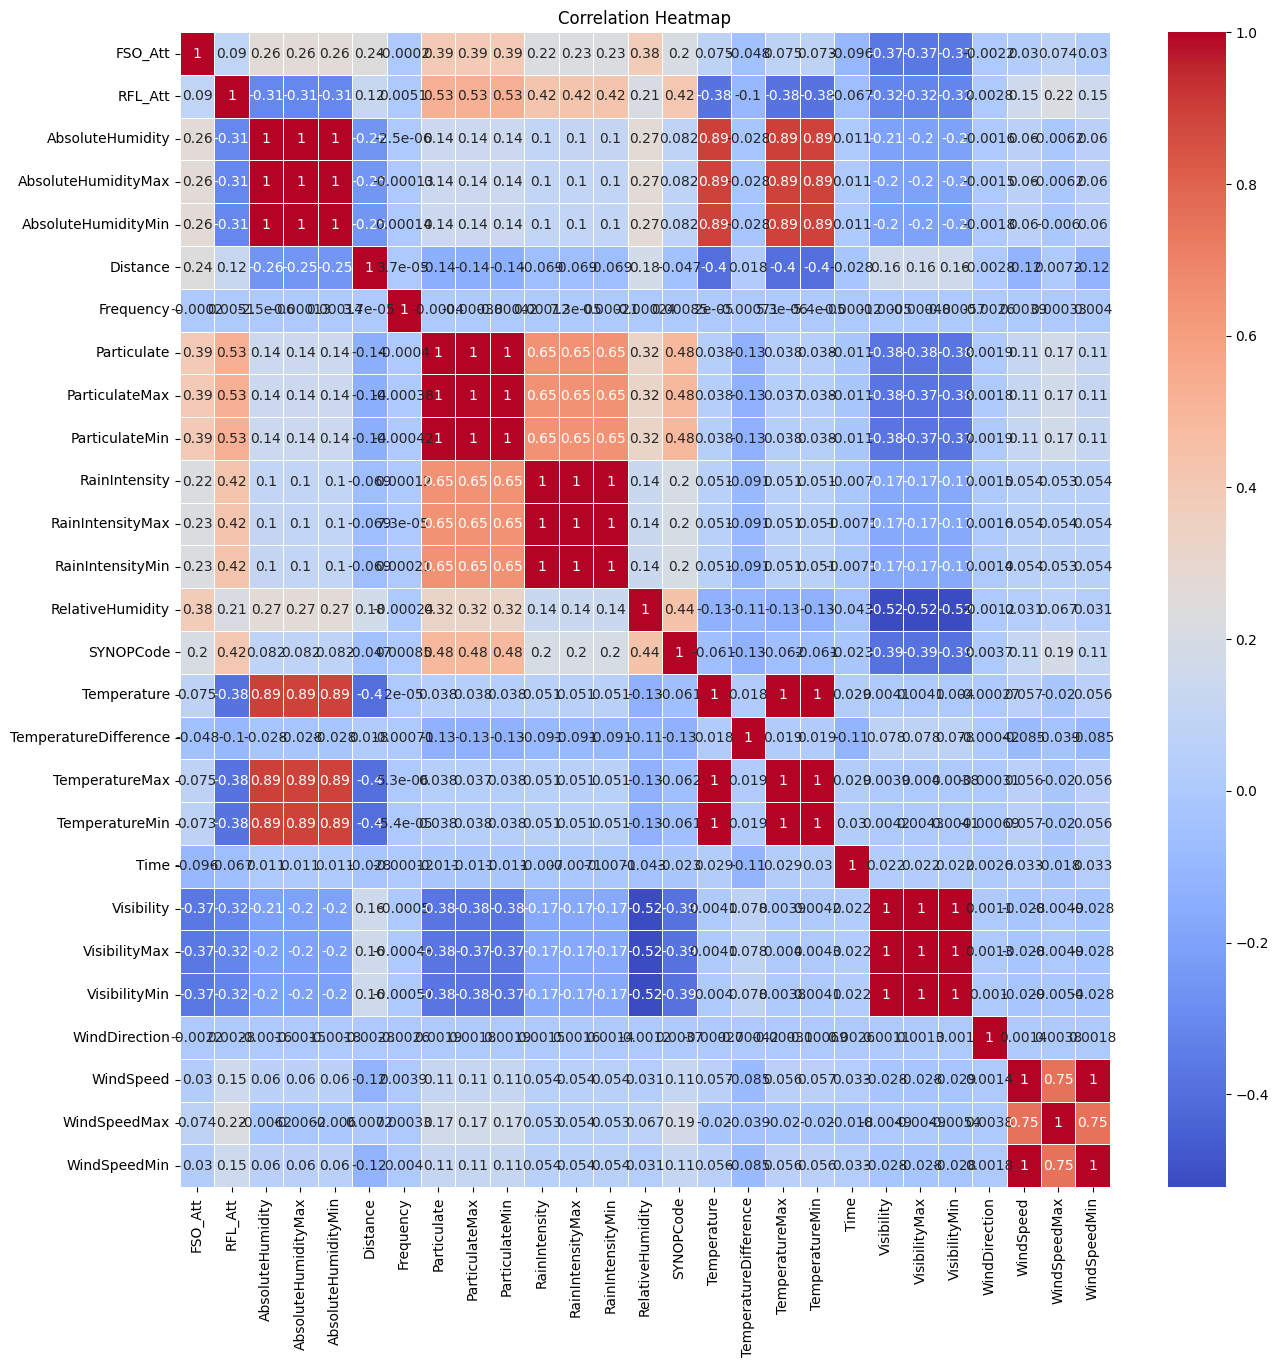

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [18]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [19]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

### Dropping features which are highly correlated i.e. corr values > 0.80

In [20]:
print(to_drop)

['AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'ParticulateMax', 'ParticulateMin', 'RainIntensityMax', 'RainIntensityMin', 'Temperature', 'TemperatureMax', 'TemperatureMin', 'VisibilityMax', 'VisibilityMin', 'WindSpeedMin']


In [21]:
new_df = df.drop(to_drop,axis=1)

In [22]:
new_df.head()

,FSO_Att,RFL_Att,AbsoluteHumidity,Distance,Frequency,Particulate,RainIntensity,RelativeHumidity,SYNOPCode,TemperatureDifference,Time,Visibility,WindDirection,WindSpeed,WindSpeedMax
0,7.913289,6.927868,17.595709,2115.338398,83500000000,0.0,0.0,71.974648,0,13.63,9,65884.51846,88.755450,3.057066,6.863808
1,7.451176,4.412096,17.549693,2113.999257,73500000000,0.0,0.0,73.502401,0,-0.54,9,64963.41092,99.790057,2.727910,6.468903
2,7.072747,6.268740,17.290230,2118.689047,83500000000,0.0,0.0,72.384543,0,-0.24,10,54794.28107,65.730085,1.674810,2.826916
3,6.949288,4.317853,16.820880,2114.632339,73500000000,0.0,0.0,70.447710,0,-0.16,10,50205.64159,88.127497,0.962068,2.780643
4,7.361052,6.114514,16.813820,2116.786055,83500000000,0.0,0.0,70.312385,0,-0.10,10,59038.32599,84.167414,1.881007,4.476298


### Predicting Linear regression 
1. Linear Regression for FSO
2. Linear Regression for RF


In [77]:
np.random.seed(192)

In [78]:
x = new_df.drop(['FSO_Att','RFL_Att'], axis = 1)

In [79]:
y = new_df['FSO_Att']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=2529)

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63965, 13), (27414, 13), (63965,), (27414,))

In [82]:
model = LinearRegression()

In [83]:
model.fit(X_train,y_train)

LinearRegression()

In [84]:
y_pred = model.predict(X_test)

In [85]:
print("Root Mean squared error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error :  3.013798917574739


### Linear regression for RF

In [ ]:
y = new_df['Rf_Att']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=2529)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Root Mean squared error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

## Random Forest Regression for FSO

In [86]:
rf_regressor = RandomForestRegressor(n_estimators=100)

In [87]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [88]:
y_pred1 = rf_regressor.predict(X_test)

In [89]:
from sklearn import metrics
error_score = metrics.r2_score(y_test, y_pred1)
print("R squared error : ", error_score)
print("Root Mean squared error : ",np.sqrt(mean_squared_error(y_test, y_pred1)))

R squared error :  0.95763607528298
Root Mean squared error :  0.8020084770310387


## Random forest regression for RF

In [90]:
new_df_worf = df.drop(to_drop,axis = 1)

In [91]:
y = new_df['RFL_Att']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=2529)

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63965, 13), (27414, 13), (63965,), (27414,))

In [94]:
rf_regressor = RandomForestRegressor(n_estimators=100)

In [95]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [96]:
y_pred2 = rf_regressor.predict(X_test)

In [97]:
from sklearn import metrics
error_score = metrics.r2_score(y_test, y_pred2)
print("R squared error : ", error_score)
print("Root Mean squared error : ",np.sqrt(mean_squared_error(y_test, y_pred2)))

R squared error :  0.9807140125520967
Root Mean squared error :  0.4814588629238787


#### The output metrics are amazing one of the best values for
    1. R- squared =  0.9807140125520967
    2. MSE = 0.23180263668795423
    3. MAE = 0.21659074642740958

# Method 1 (Recursie feature eleimination method)

In [98]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print('RMSE : ',rmse,'R2 : ',r2)
    return rmse, r2


In [99]:
def feature_ranking(X, y):
    results = []
    S = X.columns.tolist()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
    rf_model.fit(X_train, y_train)
    
    initial_rmse, initial_r2 = evaluate_model(rf_model, X_train, X_test, y_train, y_test)
    results.append({"Feature": 'All', "RMSE": initial_rmse, "R2": initial_r2})
    print(results) # Debugging
    
    while len(S) > 1:
        
        importances = rf_model.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_feature = S[least_important_idx]
        print(least_important_feature) # Debugging
        S.remove(least_important_feature)
        # new dataset by removing the least importnant feature
        X_train_sub = X_train[S]
        X_test_sub = X_test[S]
        
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
        rf_model.fit(X_train_sub, y_train)
        rmse, r2 = evaluate_model(rf_model, X_train_sub, X_test_sub , y_train, y_test)
        results.append({"Feature": least_important_feature, "RMSE": rmse, "R2": r2})

    print(S) # printing the last feature that did not get removed
    results_df = pd.DataFrame(results)
    return results_df


### Splitting subsets as per SYNOP Codes

In [23]:
unique_synop_codes = data['SYNOPCode'].unique()
print("Unique SYNOPCode values:")
print(unique_synop_codes)

Unique SYNOPCode values:
[0 6 8 5 3 4 7]


In [24]:
sc_list = []

for sc in data['SYNOPCode'].unique():
    temp = data[data['SYNOPCode'] == sc]
    sc_list.append(temp)

# Different subsets for each SYNOP code
zero_synope_code_df = sc_list[0]
six_synope_code_df = sc_list[1]
eight_synope_code_df = sc_list[2]
five_synope_code_df = sc_list[3]
three_synope_code_df = sc_list[4]
four_synope_code_df = sc_list[5]
seven_synope_code_df = sc_list[6]

print(zero_synope_code_df.columns)

Index(['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'],
      dtype='object')


## For SYNOP Code 0

In [25]:
features = zero_synope_code_df.columns[2:]
print(len(features))

25


In [26]:
X = zero_synope_code_df[features]

y_rf = zero_synope_code_df['RFL_Att']
y_fso = zero_synope_code_df['FSO_Att']

In [108]:
# For RF
print("Ranking for RF Attenuation SYNOP Code 0 :")
rf_results = feature_ranking(X, y_rf)
print(rf_results)

Ranking for RF Attenuation generic model:
RMSE :  0.37906039827710214 R2 :  0.9781142564147625
[{'Feature': 'All', 'RMSE': 0.37906039827710214, 'R2': 0.9781142564147625}]
SYNOPCode
RMSE :  0.37426652805278443 R2 :  0.9786643217049936
RainIntensity
RMSE :  0.3785560434714732 R2 :  0.9781724573591781
RainIntensityMax
RMSE :  0.372188651490797 R2 :  0.9789005696055426
RainIntensityMin
RMSE :  0.38161552711432045 R2 :  0.9778182119451431
Particulate
RMSE :  0.37816596811755826 R2 :  0.9782174176752505
ParticulateMax
RMSE :  0.37780241534806747 R2 :  0.9782592792505667
ParticulateMin
RMSE :  0.3745226658154506 R2 :  0.978635108604177
WindSpeed
RMSE :  0.3749016435954058 R2 :  0.9785918486553581
WindDirection
RMSE :  0.37173132334078446 R2 :  0.9789523897515082
WindSpeedMin
RMSE :  0.37563110759715734 R2 :  0.9785084578840574
TemperatureMax
RMSE :  0.374516764953045 R2 :  0.9786357818360146
TemperatureDifference
RMSE :  0.3786622054693814 R2 :  0.9781602130402672
WindSpeedMax
RMSE :  0.39417

### Graph for Zero SYNOP Code RF

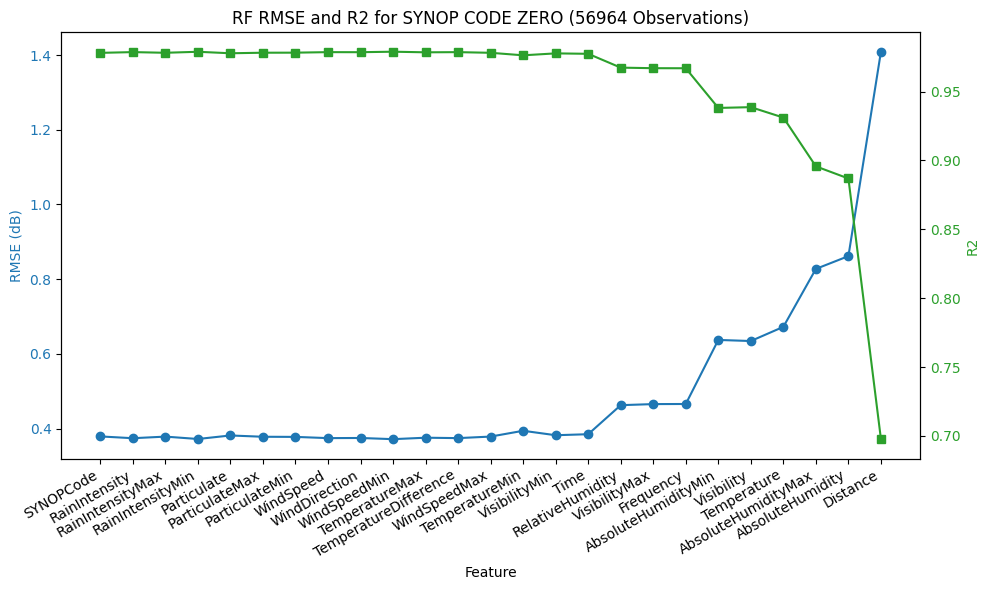

In [28]:
data = {
    'Feature': ['SYNOPCode', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'WindSpeed', 'WindDirection', 'WindSpeedMin', 'TemperatureMax', 'TemperatureDifference', 'WindSpeedMax', 'TemperatureMin', 'VisibilityMin', 'Time', 'RelativeHumidity', 'VisibilityMax', 'Frequency', 'AbsoluteHumidityMin', 'Visibility', 'Temperature', 'AbsoluteHumidityMax', 'AbsoluteHumidity','Distance'],
    'RMSE': [0.379060, 0.374267, 0.378556, 0.372189, 0.381616, 0.378166, 0.377802, 0.374523, 0.374902, 0.371731, 0.375631, 0.374517, 0.378662, 0.394176, 0.382270, 0.384981, 0.462735, 0.465599, 0.465893, 0.637347, 0.634442, 0.672398, 0.827501, 0.861737, 1.408955],
    'R2': [0.978114, 0.978664, 0.978172, 0.978901, 0.977818, 0.978217, 0.978259, 0.978635, 0.978592, 0.978952, 0.978508, 0.978636, 0.978160, 0.976334, 0.977742, 0.977425, 0.967386, 0.966981, 0.966939, 0.938128, 0.938690, 0.931135, 0.895701, 0.886892, 0.697630]
}
df = pd.DataFrame(data)
obs = len(zero_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('RF RMSE and R2 for SYNOP CODE ZERO (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

In [109]:
# For FSO
print("Ranking for FSO Attenuation SYNOP Code 0:")
rf_results = feature_ranking(X, y_fso)
print(rf_results)

Ranking for FSO Attenuation generic model:
RMSE :  0.8032376789662939 R2 :  0.9491747347096675
[{'Feature': 'All', 'RMSE': 0.8032376789662939, 'R2': 0.9491747347096675}]
SYNOPCode
RMSE :  0.804511814338635 R2 :  0.9490133637197407
RainIntensityMax
RMSE :  0.80532967968705 R2 :  0.9489096451702298
RainIntensity
RMSE :  0.8059842325010435 R2 :  0.948826561368585
RainIntensityMin
RMSE :  0.8052561005101417 R2 :  0.9489189805135596
Frequency
RMSE :  0.8043799615934076 R2 :  0.9490300749151371
ParticulateMax
RMSE :  0.803212345367293 R2 :  0.9491779406513678
WindDirection
RMSE :  0.7921724315223584 R2 :  0.9505654075698979
ParticulateMin
RMSE :  0.7922052408685515 R2 :  0.9505613126274843
WindSpeedMin
RMSE :  0.7914565896843967 R2 :  0.9506547097453186
AbsoluteHumidityMin
RMSE :  0.7848136442460547 R2 :  0.9514795747312744
Particulate
RMSE :  0.8384475398923075 R2 :  0.9446212308739207
WindSpeed
RMSE :  0.8503357158527379 R2 :  0.9430396891714272
AbsoluteHumidityMax
RMSE :  0.83918712001861

### Graph for Zero SYNOP Code FSO

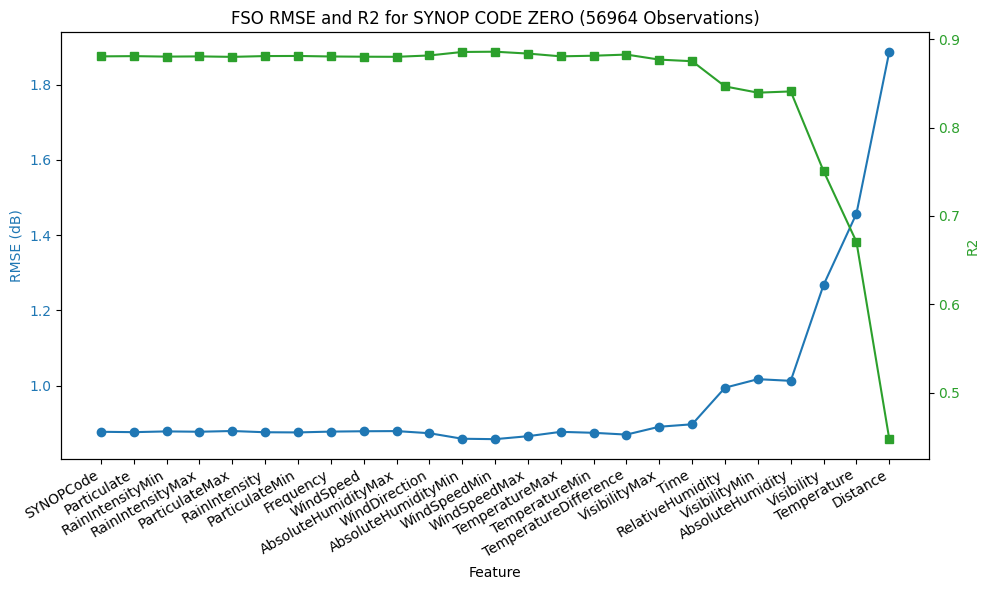

In [121]:
data = {
    'Feature': ['SYNOPCode', 'Particulate', 'RainIntensityMin', 'RainIntensityMax', 'ParticulateMax',
                'RainIntensity', 'ParticulateMin', 'Frequency', 'WindSpeed', 'AbsoluteHumidityMax', 'WindDirection',
                'AbsoluteHumidityMin', 'WindSpeedMin', 'WindSpeedMax', 'TemperatureMax', 'TemperatureMin',
                'TemperatureDifference', 'VisibilityMax', 'Time', 'RelativeHumidity', 'VisibilityMin',
                'AbsoluteHumidity', 'Visibility', 'Temperature','Distance'],
    'RMSE': [0.876991, 0.875993, 0.877998, 0.877099, 0.879055, 0.875745, 0.875289, 0.877469, 0.878408,
             0.878833, 0.873197, 0.858473, 0.857362, 0.865248, 0.876847, 0.874276, 0.869510, 0.890415,
             0.896941, 0.994271, 1.016943, 1.012490, 1.267723, 1.457182, 1.887913],
    'R2': [0.880737, 0.881008, 0.880463, 0.880708, 0.880175, 0.881076, 0.881200, 0.880607, 0.880351,
           0.880236, 0.881767, 0.885720, 0.886016, 0.883909, 0.880776, 0.881474, 0.882763, 0.877058,
           0.875249, 0.846706, 0.839636, 0.841037, 0.750791, 0.670737, 0.447313]
}
df = pd.DataFrame(data)
obs = len(zero_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('FSO RMSE and R2 for SYNOP CODE ZERO (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

## For SYNOP Code 6

In [110]:
features = six_synope_code_df.columns[2:]
print(len(features))

25


In [111]:
X = six_synope_code_df[features]

y_rf = six_synope_code_df['RFL_Att']
y_fso = six_synope_code_df['FSO_Att']

In [112]:
# For RF
print("Ranking for RF Attenuation generic model:")
rf_results = feature_ranking(X, y_rf)
print(rf_results)

Ranking for RF Attenuation generic model:
RMSE :  0.7000895594422024 R2 :  0.9689422356256074
[{'Feature': 'All', 'RMSE': 0.7000895594422024, 'R2': 0.9689422356256074}]
SYNOPCode
RMSE :  0.6969939166346023 R2 :  0.9692162896528761
WindDirection
RMSE :  0.6900729248893301 R2 :  0.9698246049110838
WindSpeedMin
RMSE :  0.6928226910096131 R2 :  0.9695836431407076
WindSpeedMax
RMSE :  0.6919876440737291 R2 :  0.9696569195486289
TemperatureMin
RMSE :  0.6883409156126269 R2 :  0.9699758888514683
WindSpeed
RMSE :  0.6854994858397164 R2 :  0.9702232526830481
Particulate
RMSE :  0.6842996021390365 R2 :  0.9703274026209618
TemperatureMax
RMSE :  0.6808166199555639 R2 :  0.9706286920325522
AbsoluteHumidityMin
RMSE :  0.671618533610279 R2 :  0.971416965523256
Frequency
RMSE :  0.8378738102198786 R2 :  0.9555143213623548
VisibilityMin
RMSE :  0.8374770253745175 R2 :  0.9555564448024921
Time
RMSE :  0.8624501973881945 R2 :  0.9528663534640578
TemperatureDifference
RMSE :  0.9315015110551081 R2 :  0.9

### Graph for 6 SYNOP Code RF

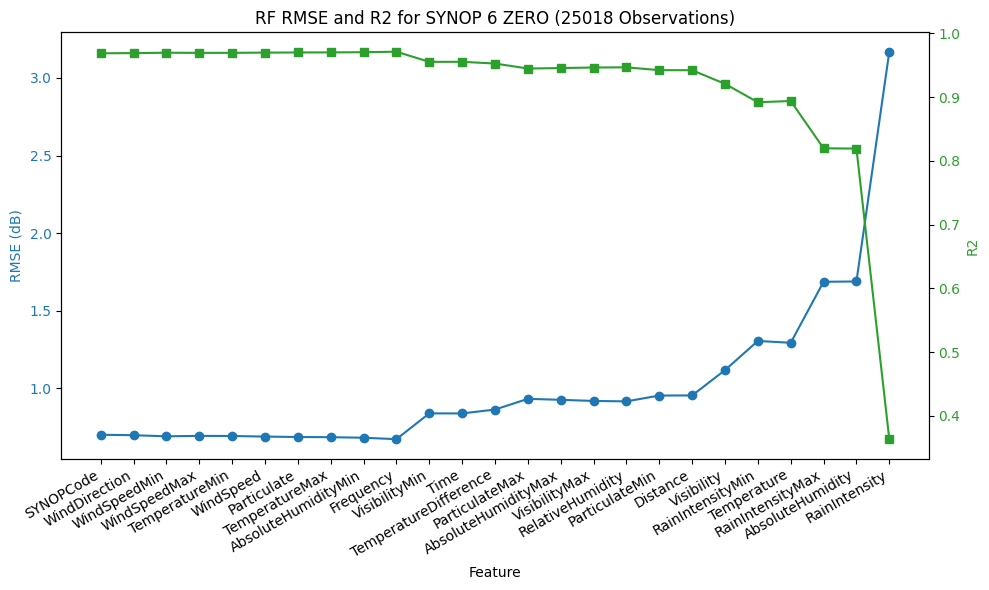

In [30]:
data = {
    'Feature': ['SYNOPCode', 'WindDirection', 'WindSpeedMin', 'WindSpeedMax', 'TemperatureMin', 'WindSpeed', 'Particulate', 'TemperatureMax', 'AbsoluteHumidityMin', 'Frequency', 'VisibilityMin', 'Time', 'TemperatureDifference', 'ParticulateMax', 'AbsoluteHumidityMax', 'VisibilityMax', 'RelativeHumidity', 'ParticulateMin', 'Distance', 'Visibility', 'RainIntensityMin', 'Temperature', 'RainIntensityMax', 'AbsoluteHumidity','RainIntensity'],
    'RMSE': [0.700090, 0.696994, 0.690073, 0.692823, 0.691988, 0.688341, 0.685499, 0.684300, 0.680817, 0.671619, 0.837874, 0.837477, 0.862450, 0.931502, 0.925236, 0.917812, 0.915260, 0.952840, 0.953472, 1.116706, 1.304811, 1.292689, 1.686073, 1.687993, 3.169038],
    'R2': [0.968942, 0.969216, 0.969825, 0.969584, 0.969657, 0.969976, 0.970223, 0.970327, 0.970629, 0.971417, 0.955514, 0.955556, 0.952866, 0.945017, 0.945754, 0.946621, 0.946917, 0.942469, 0.942392, 0.920979, 0.892116, 0.894111, 0.819858, 0.819447, 0.363618]
}
df = pd.DataFrame(data)
obs = len(six_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('RF RMSE and R2 for SYNOP 6  (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

In [113]:
# For FSO
print("Ranking for FSO Attenuation generic model:")
rf_results = feature_ranking(X, y_fso)
print(rf_results)

Ranking for FSO Attenuation generic model:
RMSE :  0.8211099096773533 R2 :  0.963071307368515
[{'Feature': 'All', 'RMSE': 0.8211099096773533, 'R2': 0.963071307368515}]
SYNOPCode
RMSE :  0.8208952592596579 R2 :  0.9630906122706192
Frequency
RMSE :  0.8233245432235191 R2 :  0.9628718363583193
WindDirection
RMSE :  0.8108515005899913 R2 :  0.9639882691711605
RainIntensityMin
RMSE :  0.8106184297639293 R2 :  0.9640089685903884
AbsoluteHumidityMax
RMSE :  0.8014554207351726 R2 :  0.964818035415227
WindSpeedMin
RMSE :  0.8015098906806482 R2 :  0.9648132530536269
AbsoluteHumidityMin
RMSE :  0.7935454409209376 R2 :  0.9655090665942874
RainIntensityMax
RMSE :  0.7925828738774964 R2 :  0.9655926905393252
WindSpeed
RMSE :  0.8049336876114684 R2 :  0.9645119976671412
TemperatureMin
RMSE :  0.7979754147828468 R2 :  0.9651228998740328
WindSpeedMax
RMSE :  0.8118958982835711 R2 :  0.9638954413468687
RainIntensity
RMSE :  0.8078594649567385 R2 :  0.9642535448386229
VisibilityMin
RMSE :  0.795541366258

### Graph for 6 SYNOP Code FSO

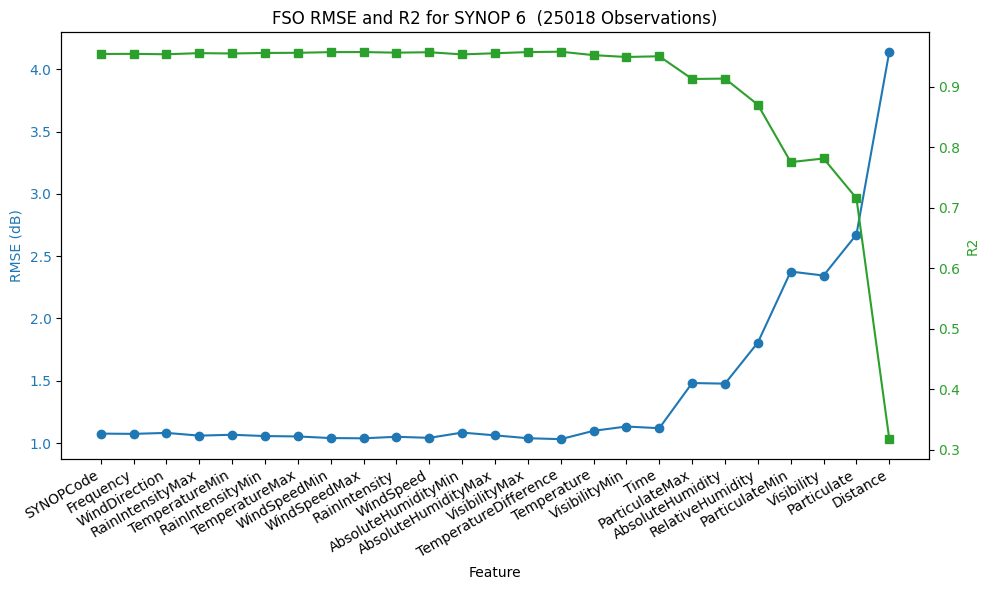

In [122]:
data = {
    'Feature': ['SYNOPCode', 'Frequency', 'WindDirection', 'RainIntensityMax', 'TemperatureMin', 'RainIntensityMin',
                'TemperatureMax', 'WindSpeedMin', 'WindSpeedMax', 'RainIntensity', 'WindSpeed', 'AbsoluteHumidityMin',
                'AbsoluteHumidityMax', 'VisibilityMax', 'TemperatureDifference', 'Temperature', 'VisibilityMin',
                'Time', 'ParticulateMax', 'AbsoluteHumidity', 'RelativeHumidity', 'ParticulateMin', 'Visibility',
                'Particulate','Distance'],
    'RMSE': [1.075518, 1.073540, 1.081281, 1.059545, 1.066289, 1.055954, 1.052769, 1.039769, 1.037921, 1.050122,
             1.041539, 1.083765, 1.061603, 1.038566, 1.031012, 1.098086, 1.132572, 1.118910, 1.481773, 1.476624,
             1.806790, 2.376558, 2.344803, 2.673516, 4.141832],
    'R2': [0.953966, 0.954135, 0.953471, 0.955323, 0.954753, 0.955626, 0.955893, 0.956975, 0.957128, 0.956114,
           0.956829, 0.953257, 0.955150, 0.957075, 0.957697, 0.952014, 0.948952, 0.950177, 0.912621, 0.913227,
           0.870085, 0.775229, 0.781196, 0.715548, 0.317303]
}
df = pd.DataFrame(data)
obs = len(six_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('FSO RMSE and R2 for SYNOP 6  (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

## For SYNOP Code 8

In [114]:
features = eight_synope_code_df.columns[2:]
print(len(features))

25


In [115]:
X = eight_synope_code_df[features]

y_rf = eight_synope_code_df['RFL_Att']
y_fso = eight_synope_code_df['FSO_Att']

In [116]:
# For RF
print("Ranking for RF Attenuation generic model:")
rf_results = feature_ranking(X, y_rf)
print(rf_results)

Ranking for RF Attenuation generic model:
RMSE :  1.01502341500803 R2 :  0.8797125496077547
[{'Feature': 'All', 'RMSE': 1.01502341500803, 'R2': 0.8797125496077547}]
SYNOPCode
RMSE :  1.0121841612425257 R2 :  0.8803845517059057
WindDirection
RMSE :  1.0129668819190705 R2 :  0.8801994832402406
WindSpeed
RMSE :  1.0003220194721119 R2 :  0.8831717542580645
TemperatureMin
RMSE :  0.994821342750176 R2 :  0.8844530766847257
WindSpeedMax
RMSE :  1.01455840666744 R2 :  0.8798227379134009
Time
RMSE :  1.0128326902038927 R2 :  0.8802312220310519
WindSpeedMin
RMSE :  1.0222774458697454 R2 :  0.8779870980712118
Temperature
RMSE :  1.0135854703453089 R2 :  0.8800531214154428
Frequency
RMSE :  1.1335143842478301 R2 :  0.8499892890508545
Distance
RMSE :  1.1805384151382448 R2 :  0.8372846796908513
TemperatureMax
RMSE :  1.2040111543896892 R2 :  0.8307497890040298
TemperatureDifference
RMSE :  1.2233475870260897 R2 :  0.8252698147476055
Visibility
RMSE :  1.2228828978138642 R2 :  0.8254025322384846
Par

### Graph for 8 SYNOP Code RF

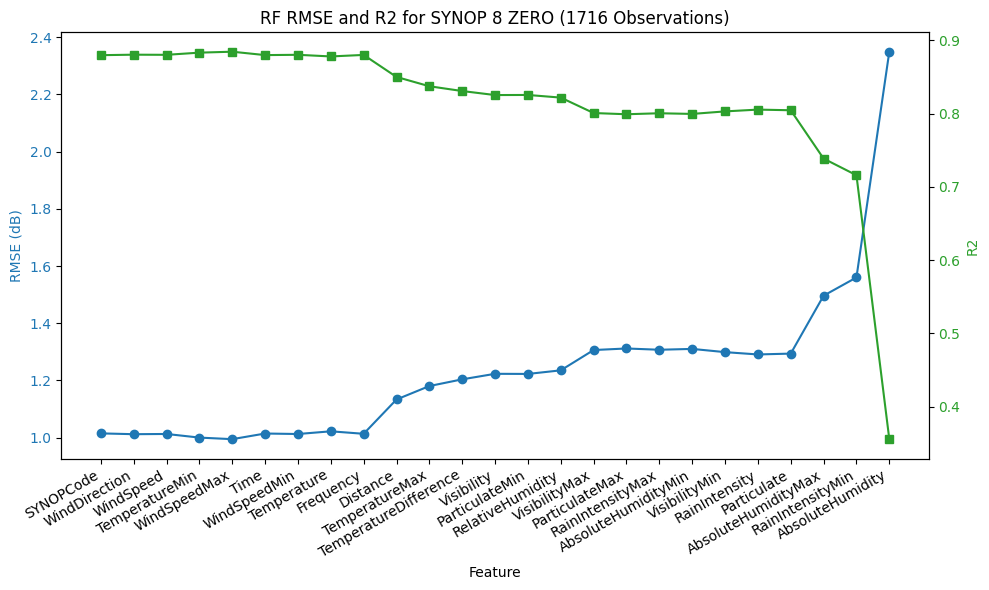

In [32]:
data = {
    'Feature': ['SYNOPCode', 'WindDirection', 'WindSpeed', 'TemperatureMin', 'WindSpeedMax', 'Time', 'WindSpeedMin', 'Temperature', 'Frequency', 'Distance', 'TemperatureMax', 'TemperatureDifference', 'Visibility', 'ParticulateMin', 'RelativeHumidity', 'VisibilityMax', 'ParticulateMax', 'RainIntensityMax', 'AbsoluteHumidityMin', 'VisibilityMin', 'RainIntensity', 'Particulate', 'AbsoluteHumidityMax', 'RainIntensityMin','AbsoluteHumidity'],
    'RMSE': [1.015023, 1.012184, 1.012967, 1.000322, 0.994821, 1.014558, 1.012833, 1.022277, 1.013585, 1.133514, 1.180538, 1.204011, 1.223348, 1.222883, 1.235477, 1.306437, 1.311888, 1.307444, 1.310392, 1.299120, 1.290995, 1.293983, 1.496456, 1.560171, 2.349552],
    'R2': [0.879713, 0.880385, 0.880199, 0.883172, 0.884453, 0.879823, 0.880231, 0.877987, 0.880053, 0.849989, 0.837285, 0.830750, 0.825270, 0.825403, 0.821788, 0.800729, 0.799062, 0.800421, 0.799520, 0.802955, 0.805411, 0.804510, 0.738546, 0.715807, 0.355477]
}
df = pd.DataFrame(data)
obs = len(eight_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('RF RMSE and R2 for SYNOP 8 ZERO (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

In [117]:
# For FSO
print("Ranking for FSO Attenuation generic model:")
rf_results = feature_ranking(X, y_fso)
print(rf_results)

Ranking for FSO Attenuation generic model:
RMSE :  1.0021375338694374 R2 :  0.9318742336937628
[{'Feature': 'All', 'RMSE': 1.0021375338694374, 'R2': 0.9318742336937628}]
SYNOPCode
RMSE :  0.9890925626959648 R2 :  0.9336362962200105
Frequency
RMSE :  0.9815856020925439 R2 :  0.9346398406040124
RainIntensity
RMSE :  0.994870553106962 R2 :  0.9328586766993201
WindSpeedMin
RMSE :  0.987284162952217 R2 :  0.9338787455070232
RainIntensityMin
RMSE :  0.9912394450407086 R2 :  0.9333478910807538
WindDirection
RMSE :  0.9865785963493612 R2 :  0.9339732193784784
WindSpeed
RMSE :  1.002458574217241 R2 :  0.9318305777638377
RainIntensityMax
RMSE :  0.9960176117298187 R2 :  0.9327037632149104
TemperatureMax
RMSE :  0.9888440174734416 R2 :  0.9336696445834317
WindSpeedMax
RMSE :  0.982833524337844 R2 :  0.9344735458978748
ParticulateMax
RMSE :  0.9999537192565741 R2 :  0.9321708236087796
TemperatureMin
RMSE :  0.9484055261571995 R2 :  0.9389838367558463
TemperatureDifference
RMSE :  0.973636992164922

### Graph for 8 SYNOP Code FSO

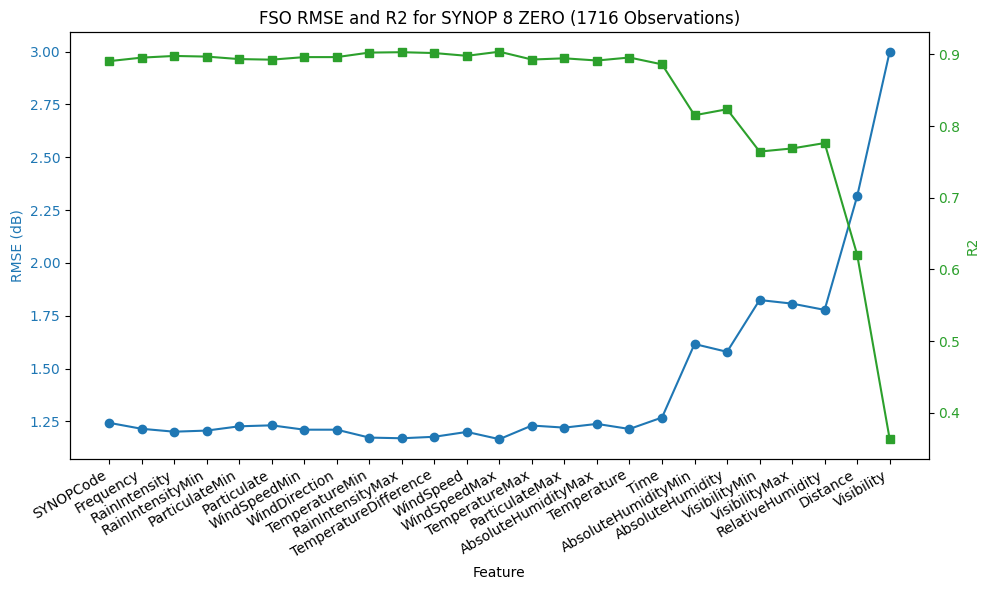

In [123]:
data = {
    'Feature': ['SYNOPCode', 'Frequency', 'RainIntensity', 'RainIntensityMin', 'ParticulateMin', 'Particulate',
                'WindSpeedMin', 'WindDirection', 'TemperatureMin', 'RainIntensityMax', 'TemperatureDifference', 'WindSpeed',
                'WindSpeedMax', 'TemperatureMax', 'ParticulateMax', 'AbsoluteHumidityMax', 'Temperature', 'Time',
                'AbsoluteHumidityMin', 'AbsoluteHumidity', 'VisibilityMin', 'VisibilityMax', 'RelativeHumidity', 'Distance','Visibility'],
    'RMSE': [1.242893, 1.214614, 1.200858, 1.206088, 1.226353, 1.230963, 1.210364, 1.210327, 1.172973, 1.169740,
             1.176793, 1.199778, 1.165501, 1.230019, 1.220095, 1.237754, 1.213714, 1.267996, 1.615928, 1.578920,
             1.824188, 1.807162, 1.777545, 2.315527, 2.999744],
    'R2': [0.890680, 0.895598, 0.897949, 0.897059, 0.893570, 0.892769, 0.896327, 0.896334, 0.902634, 0.903170,
           0.901999, 0.898133, 0.903870, 0.892933, 0.894654, 0.891582, 0.895753, 0.886219, 0.815211, 0.823578,
           0.764510, 0.768886, 0.776399, 0.620569, 0.363203]
}
df = pd.DataFrame(data)
obs = len(eight_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('FSO RMSE and R2 for SYNOP 8 ZERO (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

## For SYNOP Code 5

In [118]:
features = five_synope_code_df.columns[2:]
print(len(features))

25


In [119]:
X = five_synope_code_df[features]

y_rf = five_synope_code_df['RFL_Att']
y_fso = five_synope_code_df['FSO_Att']

In [120]:
# For RF
print("Ranking for RF Attenuation generic model:")
rf_results = feature_ranking(X, y_rf)
print(rf_results)

Ranking for RF Attenuation generic model:
RMSE :  0.6205653703835328 R2 :  0.955266483097594
[{'Feature': 'All', 'RMSE': 0.6205653703835328, 'R2': 0.955266483097594}]
SYNOPCode
RMSE :  0.6254695238501397 R2 :  0.9545566565689917
WindDirection
RMSE :  0.6185647668032068 R2 :  0.9555544455947229
WindSpeedMin
RMSE :  0.6154451950843904 R2 :  0.9560016145137136
WindSpeedMax
RMSE :  0.6169822836209314 R2 :  0.9557815661080816
TemperatureMin
RMSE :  0.6138829851851746 R2 :  0.9562246968541944
ParticulateMax
RMSE :  0.6156979849734302 R2 :  0.9559654630211429
VisibilityMax
RMSE :  0.6153499072686351 R2 :  0.9560152377754609
WindSpeed
RMSE :  0.6190908275985971 R2 :  0.9554788156616414
Particulate
RMSE :  0.6137670856826078 R2 :  0.956241224619409
TemperatureMax
RMSE :  0.5952924513137002 R2 :  0.9588358909048731
Visibility
RMSE :  0.5943003695465054 R2 :  0.9589729802722415
Time
RMSE :  0.620741725460212 R2 :  0.9552410543381322
Temperature
RMSE :  0.6330343607608777 R2 :  0.9534507661396303


### Graph for 5 SYNOP Code RF

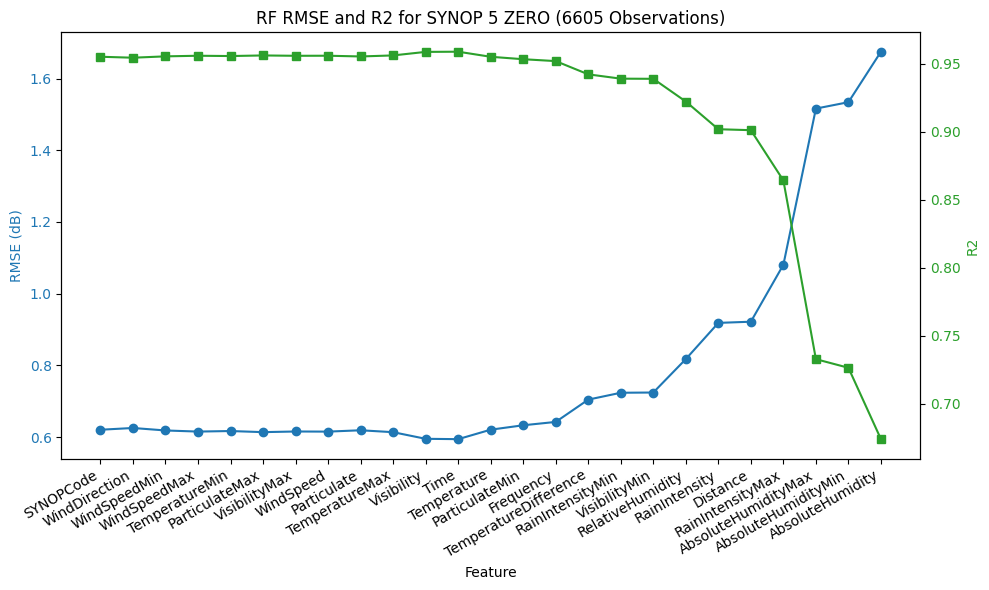

In [33]:
data = {
    'Feature': ['SYNOPCode', 'WindDirection', 'WindSpeedMin', 'WindSpeedMax', 'TemperatureMin', 'ParticulateMax', 'VisibilityMax', 'WindSpeed', 'Particulate', 'TemperatureMax', 'Visibility', 'Time', 'Temperature', 'ParticulateMin', 'Frequency', 'TemperatureDifference', 'RainIntensityMin', 'VisibilityMin', 'RelativeHumidity', 'RainIntensity', 'Distance', 'RainIntensityMax', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin','AbsoluteHumidity'],
    'RMSE': [0.620565, 0.625470, 0.618565, 0.615445, 0.616982, 0.613883, 0.615698, 0.615350, 0.619091, 0.613767, 0.595292, 0.594300, 0.620742, 0.633034, 0.642375, 0.704602, 0.723733, 0.724389, 0.817646, 0.918592, 0.921867, 1.080715, 1.516254, 1.534128, 1.674907],
    'R2': [0.955266, 0.954557, 0.955554, 0.956002, 0.955782, 0.956225, 0.955965, 0.956015, 0.955479, 0.956241, 0.958836, 0.958973, 0.955241, 0.953451, 0.952067, 0.942331, 0.939156, 0.939046, 0.922342, 0.901983, 0.901282, 0.864331, 0.732944, 0.726611, 0.674134]
}
df = pd.DataFrame(data)
obs = len(five_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('RF RMSE and R2 for SYNOP 5 ZERO (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

In [121]:
# For FSO
print("Ranking for FSO Attenuation generic model:")
rf_results = feature_ranking(X, y_fso)
print(rf_results)

Ranking for FSO Attenuation generic model:
RMSE :  0.9738276105724263 R2 :  0.9258819748241898
[{'Feature': 'All', 'RMSE': 0.9738276105724263, 'R2': 0.9258819748241898}]
SYNOPCode
RMSE :  0.9690006000827526 R2 :  0.9266149213917395
Frequency
RMSE :  0.9661729281570265 R2 :  0.927042591214198
WindDirection
RMSE :  0.9500965544198082 R2 :  0.9294503021706073
RainIntensityMax
RMSE :  0.9516190809768588 R2 :  0.9292240096887415
AbsoluteHumidityMin
RMSE :  0.9404502697513032 R2 :  0.9308756051209165
WindSpeedMin
RMSE :  0.9427816691531707 R2 :  0.9305324581547794
RainIntensity
RMSE :  0.9501088440226804 R2 :  0.9294484770226841
AbsoluteHumidityMax
RMSE :  0.9196489980712856 R2 :  0.9338996322280542
WindSpeed
RMSE :  0.9143167540186083 R2 :  0.9346639270399828
RainIntensityMin
RMSE :  0.9119196169371118 R2 :  0.9350060715137072
TemperatureDifference
RMSE :  0.9629904516683601 R2 :  0.9275224283819843
AbsoluteHumidity
RMSE :  0.9779358783634856 R2 :  0.9252552951543439
WindSpeedMax
RMSE :  0.

### Graph for 5 SYNOP Code FSO

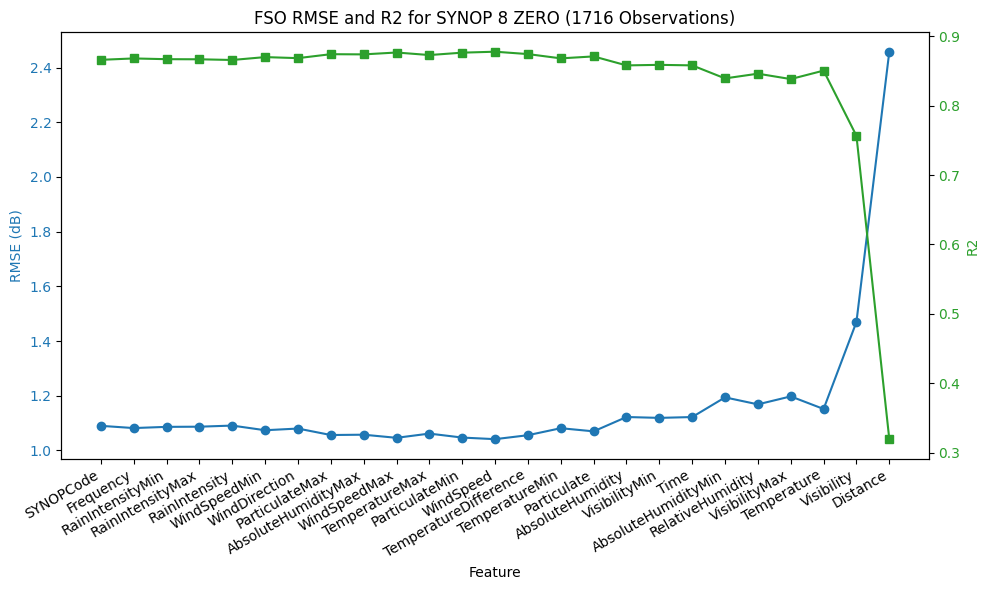

In [124]:
data = {
    'Feature': ['SYNOPCode', 'Frequency', 'RainIntensityMin', 'RainIntensityMax', 'RainIntensity', 'WindSpeedMin',
                'WindDirection', 'ParticulateMax', 'AbsoluteHumidityMax', 'WindSpeedMax', 'TemperatureMax', 'ParticulateMin',
                'WindSpeed', 'TemperatureDifference', 'TemperatureMin', 'Particulate', 'AbsoluteHumidity', 'VisibilityMin',
                'Time', 'AbsoluteHumidityMin', 'RelativeHumidity', 'VisibilityMax', 'Temperature', 'Visibility', 'Distance'],
    'RMSE': [1.090097, 1.081939, 1.086338, 1.086944, 1.091022, 1.073990, 1.080165, 1.056516, 1.057685, 1.046269,
             1.061717, 1.047209, 1.041366, 1.055841, 1.081450, 1.069922, 1.122310, 1.119183, 1.122190, 1.194144,
             1.168596, 1.197713, 1.151707, 1.469861, 2.457807],
    'R2': [0.866104, 0.868101, 0.867026, 0.866878, 0.865877, 0.870032, 0.868533, 0.874227, 0.873948, 0.876654,
           0.872985, 0.876433, 0.877808, 0.874387, 0.868220, 0.871015, 0.858074, 0.858864, 0.858104, 0.839324,
           0.846126, 0.838363, 0.850542, 0.756562, 0.319337]
}
df = pd.DataFrame(data)
obs = len(eight_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('FSO RMSE and R2 for SYNOP 8 ZERO (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

## For SYNOP Code 3

In [122]:
features = three_synope_code_df.columns[2:]
print(len(features))

25


In [123]:
X = three_synope_code_df[features]

y_rf = three_synope_code_df['RFL_Att']
y_fso = three_synope_code_df['FSO_Att']

In [124]:
# For RF
print("Ranking for RF Attenuation generic model:")
rf_results = feature_ranking(X, y_rf)
print(rf_results)

Ranking for RF Attenuation generic model:
RMSE :  0.39969141235604927 R2 :  0.9851916426836185
[{'Feature': 'All', 'RMSE': 0.39969141235604927, 'R2': 0.9851916426836185}]
Particulate
RMSE :  0.39695661828046463 R2 :  0.9853935947810031
ParticulateMax
RMSE :  0.39574933394494527 R2 :  0.985482306079367
ParticulateMin
RMSE :  0.3990633923150793 R2 :  0.9852381417504221
RainIntensity
RMSE :  0.39329846518160755 R2 :  0.9856615649352197
RainIntensityMax
RMSE :  0.4094060893194613 R2 :  0.9844630472003416
RainIntensityMin
RMSE :  0.4031170018639888 R2 :  0.9849367223453611
SYNOPCode
RMSE :  0.39180077845736927 R2 :  0.9857705589850557
WindSpeed
RMSE :  0.4121516591924289 R2 :  0.9842539598074791
WindSpeedMin
RMSE :  0.40261505365156763 R2 :  0.9849742115998963
WindSpeedMax
RMSE :  0.4006382948383766 R2 :  0.9851213965750973
VisibilityMin
RMSE :  0.40267257419662633 R2 :  0.9849699179041171
WindDirection
RMSE :  0.38634103989420976 R2 :  0.9861643699946596
VisibilityMax
RMSE :  0.37751036093

### Graph for 3 SYNOP Code RF

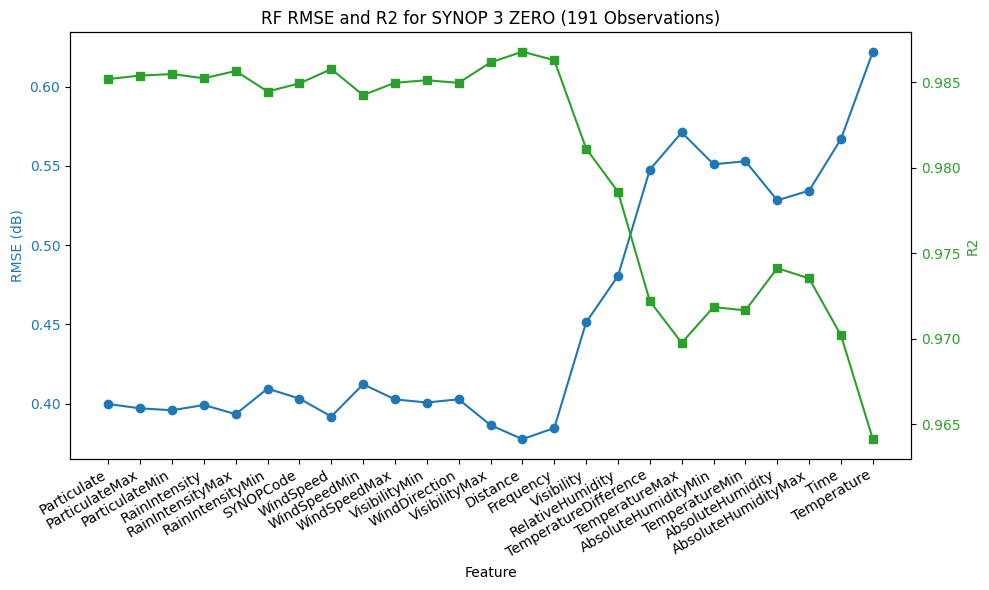

In [35]:
data = {
    'Feature': ['Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'SYNOPCode', 'WindSpeed', 'WindSpeedMin', 'WindSpeedMax', 'VisibilityMin', 'WindDirection', 'VisibilityMax', 'Distance', 'Frequency', 'Visibility', 'RelativeHumidity', 'TemperatureDifference', 'TemperatureMax', 'AbsoluteHumidityMin', 'TemperatureMin', 'AbsoluteHumidity', 'AbsoluteHumidityMax', 'Time','Temperature'],
    'RMSE': [0.399691, 0.396957, 0.395749, 0.399063, 0.393298, 0.409406, 0.403117, 0.391801, 0.412152, 0.402615, 0.400638, 0.402673, 0.386341, 0.377510, 0.384536, 0.451242, 0.480500, 0.547582, 0.571067, 0.550960, 0.552879, 0.528222, 0.534362, 0.566965, 0.622002],
    'R2': [0.985192, 0.985394, 0.985482, 0.985238, 0.985662, 0.984463, 0.984937, 0.985771, 0.984254, 0.984974, 0.985121, 0.984970, 0.986164, 0.986790, 0.986293, 0.981125, 0.978599, 0.972206, 0.969770, 0.971862, 0.971665, 0.974136, 0.973532, 0.970203, 0.964138]
}
df = pd.DataFrame(data)
obs = len(three_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('RF RMSE and R2 for SYNOP 3 ZERO (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

In [125]:
# For FSO
print("Ranking for FSO Attenuation generic model:")
rf_results = feature_ranking(X, y_fso)
print(rf_results)

Ranking for FSO Attenuation generic model:
RMSE :  2.0883023940899523 R2 :  0.9499744217740745
[{'Feature': 'All', 'RMSE': 2.0883023940899523, 'R2': 0.9499744217740745}]
Particulate
RMSE :  2.1174495660814934 R2 :  0.9485682271797135
ParticulateMax
RMSE :  1.9751103981535536 R2 :  0.9552505094748885
ParticulateMin
RMSE :  2.148908807416795 R2 :  0.9470286164722027
RainIntensity
RMSE :  2.062095527256074 R2 :  0.9512221217975009
RainIntensityMax
RMSE :  2.1458368379843584 R2 :  0.9471799585465952
RainIntensityMin
RMSE :  2.0804563225425157 R2 :  0.9503496231029496
SYNOPCode
RMSE :  2.0992690912939036 R2 :  0.9494476246069398
Frequency
RMSE :  2.0342550339236958 R2 :  0.9525303375887696
WindDirection
RMSE :  2.042206081529478 R2 :  0.9521585344924293
WindSpeedMin
RMSE :  2.1167012924122393 R2 :  0.9486045711304493
WindSpeed
RMSE :  2.030252075799801 R2 :  0.952716973099208
AbsoluteHumidityMax
RMSE :  2.0043553266553906 R2 :  0.9539155112850035
AbsoluteHumidity
RMSE :  1.9995854310445182 

### Graph for 3 SYNOP Code FSO

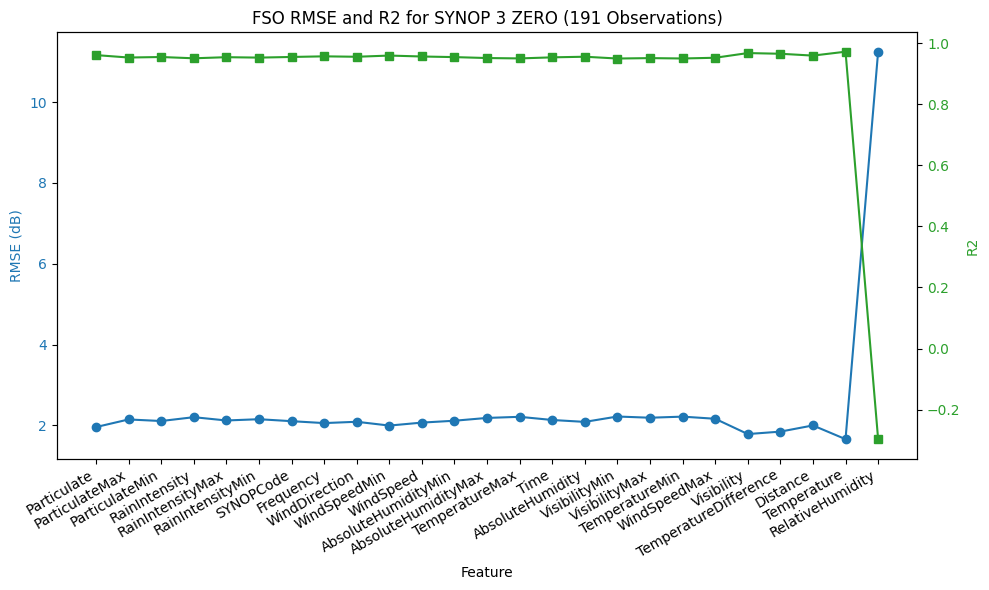

In [125]:
data = {
    'Feature': ['Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin',
                'SYNOPCode', 'Frequency', 'WindDirection', 'WindSpeedMin', 'WindSpeed', 'AbsoluteHumidityMin', 'AbsoluteHumidityMax',
                'TemperatureMax', 'Time', 'AbsoluteHumidity', 'VisibilityMin', 'VisibilityMax', 'TemperatureMin', 'WindSpeedMax',
                'Visibility', 'TemperatureDifference', 'Distance', 'Temperature','RelativeHumidity'],
    'RMSE': [1.961202, 2.149624, 2.110757, 2.205650, 2.124239, 2.155526, 2.106929, 2.059568, 2.092191, 1.998246, 2.071670, 2.118051,
             2.187241, 2.214724, 2.136161, 2.089332, 2.222223, 2.192211, 2.219368, 2.166399, 1.788264, 1.848567, 2.001702, 1.662110, 11.243964],
    'R2': [0.960560, 0.952618, 0.954316, 0.950116, 0.953730, 0.952357, 0.954481, 0.956505, 0.955116, 0.959056, 0.955992, 0.953999,
           0.950945, 0.949704, 0.953209, 0.955238, 0.949363, 0.950722, 0.949493, 0.951875, 0.967209, 0.964960, 0.958914, 0.971672, -0.296375]
}
df = pd.DataFrame(data)
obs = len(three_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('FSO RMSE and R2 for SYNOP 3 ZERO (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

## For SYNOP Code 4

In [126]:
features = four_synope_code_df.columns[2:]
print(len(features))

25


In [127]:
X = four_synope_code_df[features]

y_rf = four_synope_code_df['RFL_Att']
y_fso = four_synope_code_df['FSO_Att']

In [128]:
# For RF
print("Ranking for RF Attenuation generic model:")
rf_results = feature_ranking(X, y_rf)
print(rf_results)

Ranking for RF Attenuation generic model:
RMSE :  0.5272202079942034 R2 :  0.9023378740687432
[{'Feature': 'All', 'RMSE': 0.5272202079942034, 'R2': 0.9023378740687432}]
SYNOPCode
RMSE :  0.5209482852403662 R2 :  0.9046476714235335
WindSpeedMin
RMSE :  0.5300865690307319 R2 :  0.9012730594982274
WindDirection
RMSE :  0.5324499044459412 R2 :  0.9003907696390374
WindSpeed
RMSE :  0.5092452107060194 R2 :  0.9088837192252938
VisibilityMax
RMSE :  0.5089202457441517 R2 :  0.9089999702991945
Distance
RMSE :  0.49177606134986035 R2 :  0.9150278031892892
Particulate
RMSE :  0.5055982477364167 R2 :  0.9101841058321744
Time
RMSE :  0.5086347103447347 R2 :  0.9091020548234932
TemperatureDifference
RMSE :  0.498543920410074 R2 :  0.9126729224067565
Frequency
RMSE :  0.5280406186619103 R2 :  0.9020336922914934
ParticulateMin
RMSE :  0.5265992502923946 R2 :  0.9025677906584427
AbsoluteHumidityMax
RMSE :  0.5148169042512775 R2 :  0.9068789905674594
WindSpeedMax
RMSE :  0.4656264832769656 R2 :  0.92382

### Graph for 4 SYNOP Code RF

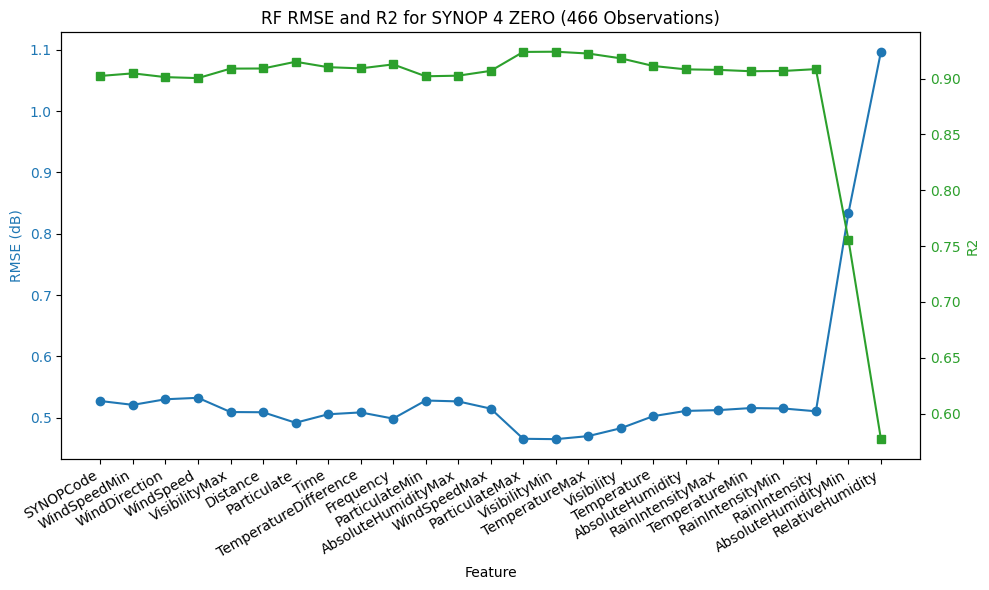

In [36]:
data = {
    'Feature': ['SYNOPCode', 'WindSpeedMin', 'WindDirection', 'WindSpeed', 'VisibilityMax', 'Distance', 'Particulate', 'Time', 'TemperatureDifference', 'Frequency', 'ParticulateMin', 'AbsoluteHumidityMax', 'WindSpeedMax', 'ParticulateMax', 'VisibilityMin', 'TemperatureMax', 'Visibility', 'Temperature', 'AbsoluteHumidity', 'RainIntensityMax', 'TemperatureMin', 'RainIntensityMin', 'RainIntensity', 'AbsoluteHumidityMin','RelativeHumidity'],
    'RMSE': [0.527220, 0.520948, 0.530087, 0.532450, 0.509245, 0.508920, 0.491776, 0.505598, 0.508635, 0.498544, 0.528041, 0.526599, 0.514817, 0.465626, 0.465008, 0.469994, 0.482821, 0.502558, 0.511075, 0.512364, 0.515742, 0.515042, 0.510493, 0.833696, 1.096945],
    'R2': [0.902338, 0.904648, 0.901273, 0.900391, 0.908884, 0.909000, 0.915028, 0.910184, 0.909102, 0.912673, 0.902034, 0.902568, 0.906879, 0.923824, 0.924026, 0.922388, 0.918094, 0.911261, 0.908228, 0.907764, 0.906544, 0.906798, 0.908437, 0.755793, 0.577222]
}
df = pd.DataFrame(data)
obs = len(four_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('RF RMSE and R2 for SYNOP 4 ZERO (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

In [129]:
# For FSO
print("Ranking for FSO Attenuation generic model:")
rf_results = feature_ranking(X, y_fso)
print(rf_results)

Ranking for FSO Attenuation generic model:
RMSE :  0.6933408590390399 R2 :  0.9688895201421627
[{'Feature': 'All', 'RMSE': 0.6933408590390399, 'R2': 0.9688895201421627}]
SYNOPCode
RMSE :  0.6974203591752276 R2 :  0.9685223455297227
Frequency
RMSE :  0.7004175168703146 R2 :  0.968251214315291
RainIntensity
RMSE :  0.6890458065266404 R2 :  0.969273767717212
RainIntensityMax
RMSE :  0.6897596143941244 R2 :  0.9692100738770043
RainIntensityMin
RMSE :  0.6749553279198646 R2 :  0.9705175764390525
WindDirection
RMSE :  0.6752807048280018 R2 :  0.9704891442994461
AbsoluteHumidityMin
RMSE :  0.6751941152835981 R2 :  0.9704967120196547
AbsoluteHumidityMax
RMSE :  0.6658506664636326 R2 :  0.9713076051346936
WindSpeedMin
RMSE :  0.6818655236223979 R2 :  0.9699108038158777
WindSpeed
RMSE :  0.6717656365884618 R2 :  0.9707955729853089
VisibilityMax
RMSE :  0.6851170933718228 R2 :  0.9696231506303253
TemperatureDifference
RMSE :  0.7210113683636001 R2 :  0.9663567962145119
VisibilityMin
RMSE :  0.716

### Graph for 4 SYNOP Code FSO

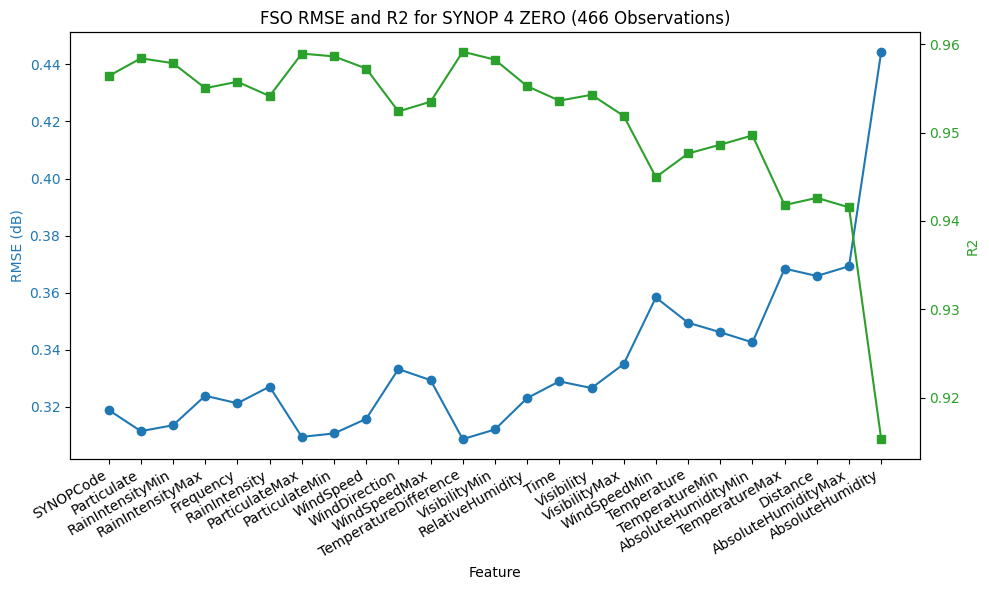

In [126]:
data = {
    'Feature': ['SYNOPCode', 'Particulate', 'RainIntensityMin', 'RainIntensityMax', 'Frequency', 'RainIntensity',
                'ParticulateMax', 'ParticulateMin', 'WindSpeed', 'WindDirection', 'WindSpeedMax', 'TemperatureDifference',
                'VisibilityMin', 'RelativeHumidity', 'Time', 'Visibility', 'VisibilityMax', 'WindSpeedMin', 'Temperature',
                'TemperatureMin', 'AbsoluteHumidityMin', 'TemperatureMax', 'Distance', 'AbsoluteHumidityMax','AbsoluteHumidity'],
    'RMSE': [0.318937, 0.311523, 0.313581, 0.323918, 0.321294, 0.327119, 0.309519, 0.310712, 0.315822, 0.333258, 0.329393,
             0.308714, 0.312108, 0.323099, 0.328965, 0.326612, 0.335021, 0.358337, 0.349511, 0.346169, 0.342618, 0.368447,
             0.365872, 0.369283, 0.444436],
    'R2': [0.956391, 0.958395, 0.957844, 0.955018, 0.955744, 0.954125, 0.958929, 0.958612, 0.957239, 0.952387, 0.953485,
           0.959142, 0.958239, 0.955246, 0.953606, 0.954267, 0.951882, 0.944952, 0.947630, 0.948626, 0.949675, 0.941801,
           0.942612, 0.941537, 0.915320]
}
df = pd.DataFrame(data)
obs = len(four_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('FSO RMSE and R2 for SYNOP 4 ZERO (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

## For SYNOP Code 7

In [130]:
features = seven_synope_code_df.columns[2:]
print(len(features))

25


In [131]:
X = seven_synope_code_df[features]

y_rf = seven_synope_code_df['RFL_Att']
y_fso = seven_synope_code_df['FSO_Att']

In [132]:
# For RF
print("Ranking for RF Attenuation generic model:")
rf_results = feature_ranking(X, y_rf)
print(rf_results)

Ranking for RF Attenuation generic model:
RMSE :  0.2494815843029981 R2 :  0.9663643013985557
[{'Feature': 'All', 'RMSE': 0.2494815843029981, 'R2': 0.9663643013985557}]
SYNOPCode
RMSE :  0.24885623820169922 R2 :  0.9665327113545641
WindSpeed
RMSE :  0.2510702732227056 R2 :  0.9659345558275167
Distance
RMSE :  0.2516404591230837 R2 :  0.9657796534453933
TemperatureMax
RMSE :  0.2493425515008697 R2 :  0.9664017804162945
WindDirection
RMSE :  0.24608323687044736 R2 :  0.967274406842579
WindSpeedMin
RMSE :  0.25162060994219754 R2 :  0.9657850517749144
TemperatureMin
RMSE :  0.24330953254695306 R2 :  0.9680079761930337
Visibility
RMSE :  0.2455101540187652 R2 :  0.9674266532012934
ParticulateMin
RMSE :  0.24660445294956276 R2 :  0.9671356312847448
ParticulateMax
RMSE :  0.24326036524839703 R2 :  0.9680209046010553
Frequency
RMSE :  0.29334240140711243 R2 :  0.9534978372787022
VisibilityMax
RMSE :  0.2875296064387247 R2 :  0.9553225265502464
Temperature
RMSE :  0.2943904433353674 R2 :  0.953

### Graph for 7 SYNOP Code RF

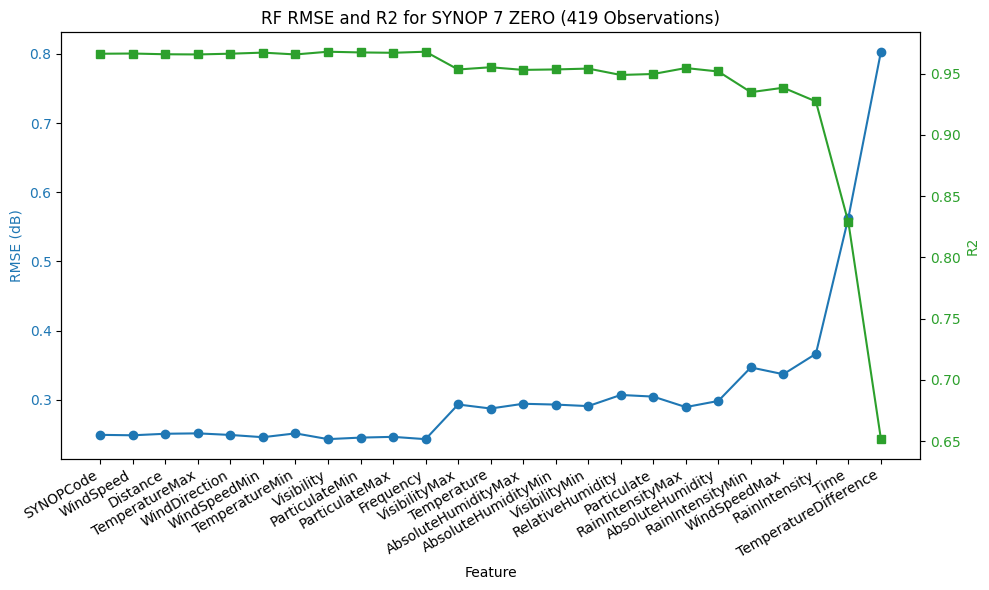

In [39]:
data = {
    'Feature': ['SYNOPCode', 'WindSpeed', 'Distance', 'TemperatureMax', 'WindDirection', 'WindSpeedMin', 'TemperatureMin', 'Visibility', 'ParticulateMin', 'ParticulateMax', 'Frequency', 'VisibilityMax', 'Temperature', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'VisibilityMin', 'RelativeHumidity', 'Particulate', 'RainIntensityMax', 'AbsoluteHumidity', 'RainIntensityMin', 'WindSpeedMax', 'RainIntensity', 'Time','TemperatureDifference'],
    'RMSE': [0.249482, 0.248856, 0.251070, 0.251640, 0.249343, 0.246083, 0.251621, 0.243310, 0.245510, 0.246604, 0.243260, 0.293342, 0.287530, 0.294390, 0.293224, 0.291011, 0.307119, 0.304750, 0.289591, 0.298466, 0.346891, 0.337066, 0.366551, 0.563281, 0.802995],
    'R2': [0.966364, 0.966533, 0.965935, 0.965780, 0.966402, 0.967274, 0.965785, 0.968008, 0.967427, 0.967136, 0.968021, 0.953498, 0.955323, 0.953165, 0.953535, 0.954234, 0.949028, 0.949811, 0.954680, 0.951859, 0.934971, 0.938602, 0.927391, 0.828536, 0.651543]
}
df = pd.DataFrame(data)
obs = len(seven_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('RF RMSE and R2 for SYNOP 7 ZERO (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

In [133]:
# For FSO
print("Ranking for FSO Attenuation generic model:")
rf_results = feature_ranking(X, y_fso)
print(rf_results)

Ranking for FSO Attenuation generic model:
RMSE :  0.9936579380596096 R2 :  0.9631024139991473
[{'Feature': 'All', 'RMSE': 0.9936579380596096, 'R2': 0.9631024139991473}]
SYNOPCode
RMSE :  0.9663287370908044 R2 :  0.9651041379892785
Frequency
RMSE :  0.9689787625108007 R2 :  0.9649124812211669
RainIntensityMin
RMSE :  0.9968787422131077 R2 :  0.9628628295401579
Distance
RMSE :  0.9519927307360184 R2 :  0.9661318553970405
WindDirection
RMSE :  0.9482037640327485 R2 :  0.966400911868532
RainIntensity
RMSE :  0.9610746444409228 R2 :  0.9654825757677274
WindSpeed
RMSE :  0.9542137028511904 R2 :  0.9659736442140566
AbsoluteHumidityMax
RMSE :  0.9241995263833632 R2 :  0.9680805334814643
AbsoluteHumidityMin
RMSE :  0.9279093989457745 R2 :  0.9678237603030022
VisibilityMin
RMSE :  0.9515167190909383 R2 :  0.9661657161612475
RainIntensityMax
RMSE :  0.9106755359077808 R2 :  0.9690078660130177
AbsoluteHumidity
RMSE :  0.8804576630108151 R2 :  0.971030493546019
WindSpeedMin
RMSE :  0.8919175995984

### Graph for 7 SYNOP Code FSO

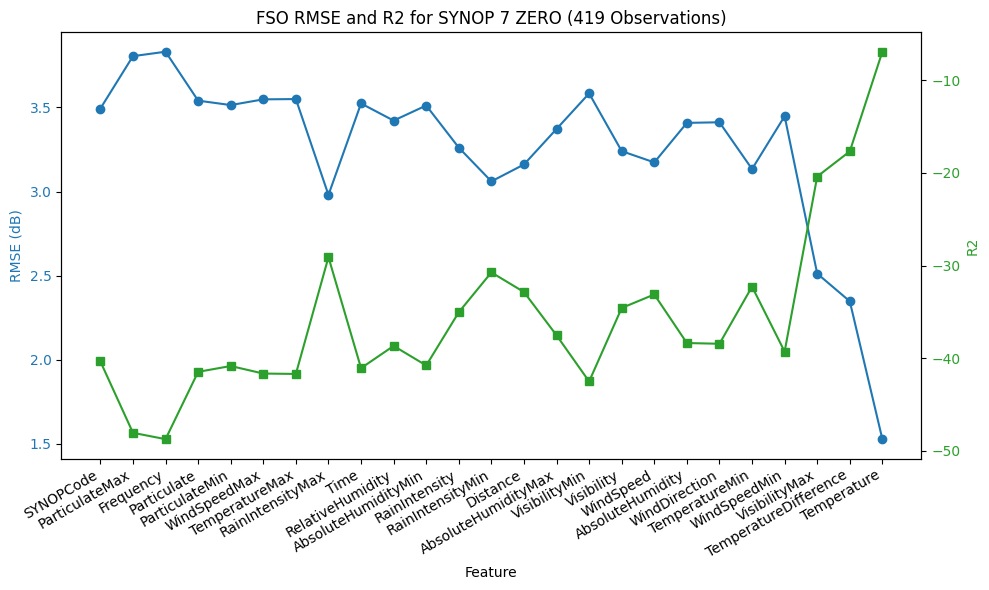

In [127]:
data = {
    'Feature': ['SYNOPCode', 'ParticulateMax', 'Frequency', 'Particulate', 'ParticulateMin', 'WindSpeedMax', 'TemperatureMax',
                'RainIntensityMax', 'Time', 'RelativeHumidity', 'AbsoluteHumidityMin', 'RainIntensity', 'RainIntensityMin', 
                'Distance', 'AbsoluteHumidityMax', 'VisibilityMin', 'Visibility', 'WindSpeed', 'AbsoluteHumidity', 
                'WindDirection', 'TemperatureMin', 'WindSpeedMin', 'VisibilityMax', 'TemperatureDifference', 'Temperature'],
    'RMSE': [3.493172, 3.804728, 3.831234, 3.540273, 3.513945, 3.547992, 3.549643, 2.979833, 3.523544, 3.421640, 3.511406, 
             3.260924, 3.060274, 3.160722, 3.371881, 3.583323, 3.240055, 3.173095, 3.408120, 3.411639, 3.133625, 3.447930, 
             2.512018, 2.347278, 1.527644],
    'R2': [-40.361117, -48.068124, -48.754182, -41.484038, -40.854505, -41.669488, -41.709218, -29.097883, -41.083477, -38.684491, 
           -40.794025, -35.044049, -30.744808, -32.862954, -37.538678, -42.523523, -34.584172, -33.128597, -38.371490, -38.452837, 
           -32.284819, -39.296652, -20.389349, -17.675895, -6.910360]
}
df = pd.DataFrame(data)
obs = len(seven_synope_code_df)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('FSO RMSE and R2 for SYNOP 7 ZERO (' + str(obs) + ' Observations)')
plt.tight_layout()
plt.show()

## For generic Random forest model RF

In [134]:
features = data.columns[2:]
print(len(features))

25


In [135]:
X = data[features]

y_rf = data['RFL_Att']
y_fso = data['FSO_Att']

In [136]:
# For RF
print("Ranking for RF Attenuation generic model:")
rf_results = feature_ranking(X, y_rf)
print(rf_results)

Ranking for RF Attenuation generic model:
RMSE :  0.48984621705412634 R2 :  0.9797442903816173
[{'Feature': 'All', 'RMSE': 0.48984621705412634, 'R2': 0.9797442903816173}]
WindDirection
RMSE :  0.4880762649754263 R2 :  0.9798904050726385
WindSpeedMin
RMSE :  0.48579895964193104 R2 :  0.9800776251956681
WindSpeed
RMSE :  0.48348281362648543 R2 :  0.9802671403426215
Particulate
RMSE :  0.4833621193956898 R2 :  0.9802769911376447
WindSpeedMax
RMSE :  0.48444950915476637 R2 :  0.9801881520642726
TemperatureMin
RMSE :  0.47795091388890626 R2 :  0.9807161147635437
VisibilityMax
RMSE :  0.47403432571789017 R2 :  0.9810308650022717
ParticulateMin
RMSE :  0.47585337369957637 R2 :  0.9808850022634014
TemperatureDifference
RMSE :  0.5046235990279382 R2 :  0.9785037324467913
AbsoluteHumidityMax
RMSE :  0.49863414745563484 R2 :  0.9790109888349262
Time
RMSE :  0.5671218056855863 R2 :  0.9728493245893949
VisibilityMin
RMSE :  0.5631003765311812 R2 :  0.9732330072688435
AbsoluteHumidityMin
RMSE :  0.5

### Graph for generic SYNOP Code RF

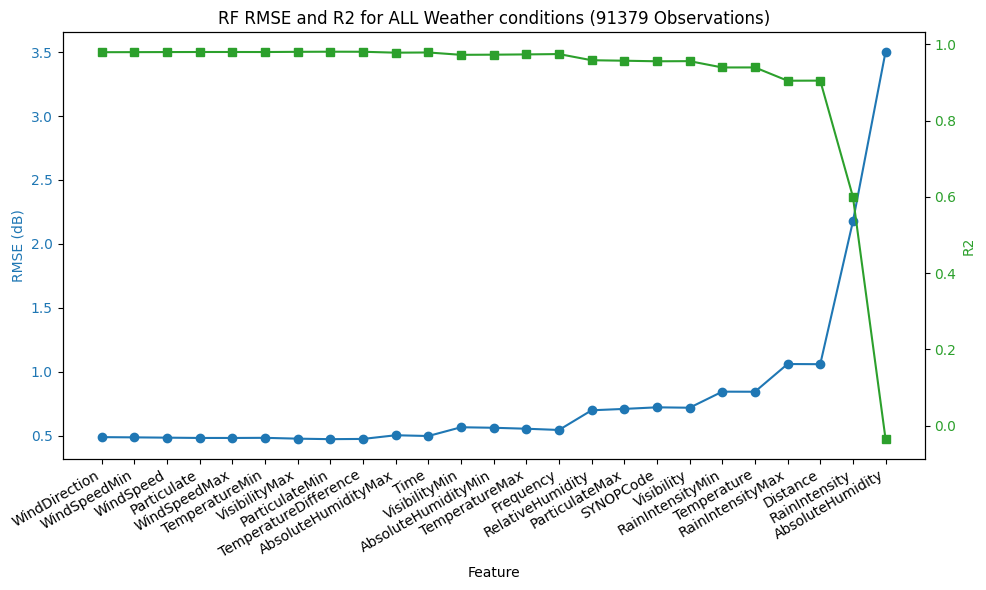

In [41]:
data = {
    'Feature': ['WindDirection', 'WindSpeedMin', 'WindSpeed', 'Particulate', 'WindSpeedMax', 'TemperatureMin', 'VisibilityMax', 'ParticulateMin', 'TemperatureDifference', 'AbsoluteHumidityMax', 'Time', 'VisibilityMin', 'AbsoluteHumidityMin', 'TemperatureMax', 'Frequency', 'RelativeHumidity', 'ParticulateMax', 'SYNOPCode', 'Visibility', 'RainIntensityMin', 'Temperature', 'RainIntensityMax', 'Distance', 'RainIntensity','AbsoluteHumidity'],
    'RMSE': [0.489846, 0.488076, 0.485799, 0.483483, 0.483362, 0.484450, 0.477951, 0.474034, 0.475853, 0.504624, 0.498634, 0.567122, 0.563100, 0.555603, 0.545904, 0.699785, 0.710542, 0.722930, 0.719752, 0.845339, 0.844765, 1.061405, 1.060083, 2.175729, 3.502741],
    'R2': [0.979744, 0.979890, 0.980078, 0.980267, 0.980277, 0.980188, 0.980716, 0.981031, 0.980885, 0.978504, 0.979011, 0.972849, 0.973233, 0.973941, 0.974843, 0.958661, 0.957381, 0.955882, 0.956269, 0.939676, 0.939758, 0.904898, 0.905135, 0.600389, -0.035724]
}
df = pd.DataFrame(data)
obs = len(data)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('RF RMSE and R2 for ALL Weather conditions (91379 Observations)')
plt.tight_layout()
plt.show()

In [137]:
# For FSO
print("Ranking for FSO Attenuation generic model:")
rf_results = feature_ranking(X, y_fso)
print(rf_results)

Ranking for FSO Attenuation generic model:
RMSE :  0.7844528013662615 R2 :  0.958985616838711
[{'Feature': 'All', 'RMSE': 0.7844528013662615, 'R2': 0.958985616838711}]
Frequency
RMSE :  0.7806855612767378 R2 :  0.9593786041998938
RainIntensityMin
RMSE :  0.7818701785410141 R2 :  0.9592552323365919
SYNOPCode
RMSE :  0.7816023024804671 R2 :  0.9592831466334556
RainIntensity
RMSE :  0.7841113092617502 R2 :  0.9590213182585918
WindDirection
RMSE :  0.7753897595064848 R2 :  0.9599278476457395
RainIntensityMax
RMSE :  0.7760623612223543 R2 :  0.9598582973635977
WindSpeed
RMSE :  0.7769499379648378 R2 :  0.9597664253242734
AbsoluteHumidityMin
RMSE :  0.7674234221829598 R2 :  0.9607470186674444
WindSpeedMin
RMSE :  0.7809704717352545 R2 :  0.9593489493095285
AbsoluteHumidityMax
RMSE :  0.7740925400249055 R2 :  0.9600618161256224
WindSpeedMax
RMSE :  0.7824136175766297 R2 :  0.9591985733339659
ParticulateMax
RMSE :  0.7800945534599262 R2 :  0.9594400847147954
Time
RMSE :  0.9214299822140434 R2 

### Graph for Genereic model FSO

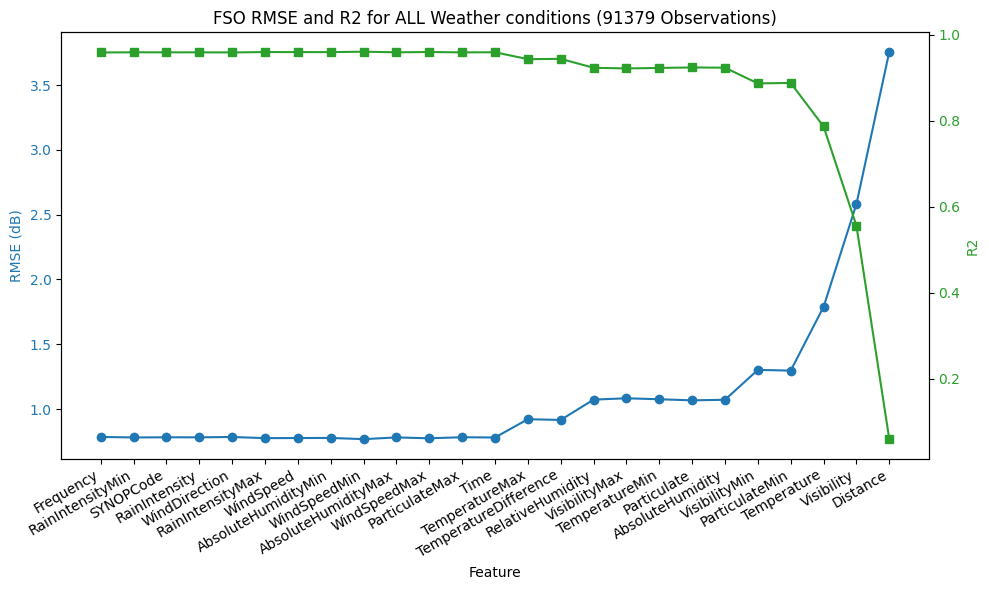

In [3]:
data = {
    'Feature': ['Frequency', 'RainIntensityMin', 'SYNOPCode', 'RainIntensity', 'WindDirection', 'RainIntensityMax', 'WindSpeed', 'AbsoluteHumidityMin', 'WindSpeedMin', 'AbsoluteHumidityMax', 'WindSpeedMax', 'ParticulateMax', 'Time', 'TemperatureMax', 'TemperatureDifference', 'RelativeHumidity', 'VisibilityMax', 'TemperatureMin', 'Particulate', 'AbsoluteHumidity', 'VisibilityMin', 'ParticulateMin', 'Temperature', 'Visibility','Distance'],
    'RMSE': [0.784453, 0.780686, 0.781870, 0.781602, 0.784111, 0.775390, 0.776062, 0.776950, 0.767423, 0.780970, 0.774093, 0.782414, 0.780095, 0.921430, 0.915673, 1.072529, 1.082886, 1.075344, 1.066919, 1.071401, 1.302007, 1.296239, 1.788446, 2.581449, 3.757044],
    'R2': [0.958986, 0.959379, 0.959255, 0.959283, 0.959021, 0.959928, 0.959858, 0.959766, 0.960747, 0.959349, 0.960062, 0.959199, 0.959440, 0.943412, 0.944117, 0.923331, 0.921843, 0.922928, 0.924131, 0.923492, 0.887013, 0.888012, 0.786816, 0.555850, 0.059205]
}
df = pd.DataFrame(data)
obs = len(data)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Feature'], df['RMSE'], color='tab:blue', marker='o', label='RMSE')
ax1.set_xlabel('Feature')
ax1.set_ylabel('RMSE (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Feature'], df['R2'], color='tab:green', marker='s', label='R2')
ax2.set_ylabel('R2', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.title('FSO RMSE and R2 for ALL Weather conditions (91379 Observations)')
plt.tight_layout()
plt.show()

### Specific models using "important features'

Index(['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'],
      dtype='object')

In [65]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print('RMSE : ',rmse,'R2 : ',r2)
    return rmse, r2


In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
data = pd.read_csv('/kaggle/input/rfo-data/RFLFSODataFull.csv')
new_data = pd.read_csv('/kaggle/input/rfo-data/RFLFSODataFull.csv')

In [131]:
sc_list = []

for sc in data['SYNOPCode'].unique():
    temp = data[data['SYNOPCode'] == sc]
    sc_list.append(temp)

# Different subsets for each SYNOP code
zero_synope_code_df = sc_list[0]
six_synope_code_df = sc_list[1]
eight_synope_code_df = sc_list[2]
five_synope_code_df = sc_list[3]
three_synope_code_df = sc_list[4]
four_synope_code_df = sc_list[5]
seven_synope_code_df = sc_list[6]

print(zero_synope_code_df.columns)

Index(['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'],
      dtype='object')


In [132]:
def evaluate_random_forest(data, important_features, target_column):
    X = data[important_features]
    y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return rmse, r2

## List of important features obtained through Recursive elimination

In [133]:
imp_rf_zero_sc = ['VisibilityMax','Frequency', 'AbsoluteHumidityMin','Visibility', 'Temperature', 'AbsoluteHumidityMax', 'AbsoluteHumidity', 'Distance']
imp_rf_four_sc = ['TemperatureMin', 'RainIntensityMin', 'RainIntensity',  'AbsoluteHumidityMin', 'RelativeHumidity']
imp_rf_five_sc = ['VisibilityMin', 'RelativeHumidity', 'RainIntensity', 'Distance', 'RainIntensityMax', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'AbsoluteHumidity']
imp_rf_six_sc = ['Distance', 'Visibility', 'RainIntensityMin', 'Temperature', 'RainIntensityMax', 'AbsoluteHumidity', 'RainIntensity']
imp_rf_seven_sc = ['AbsoluteHumidity', 'RainIntensityMin', 'WindSpeedMax', 'RainIntensity', 'Time', 'TemperatureDifference']
imp_rf_eight_sc = ['Particulate', 'AbsoluteHumidityMax', 'RainIntensityMin', 'AbsoluteHumidity']
imp_rf_three_sc = ['Distance', 'Frequency', 'Visibility', 'RelativeHumidity', 'TemperatureDifference', 'TemperatureMax', 'AbsoluteHumidityMin', 'TemperatureMin' ,'AbsoluteHumidity', 'AbsoluteHumidityMax', 'Time', 'Temperature']
imp_rf_all = ['Temperature', 'RainIntensityMax', 'Distance', 'RainIntensity', 'AbsoluteHumidity']

# For FSO 
imp_fso_zero_sc = ['Time', 'RelativeHumidity', 'VisibilityMin', 'AbsoluteHumidity', 'Visibility', 'Temperature', 'Distance']
imp_fso_four_sc = ['VisibilityMax', 'WindSpeedMin' ,'Temperature', 'TemperatureMin' , 'AbsoluteHumidityMin' ,'TemperatureMax' ,'Distance' , 'AbsoluteHumidityMax', 'AbsoluteHumidity']
imp_fso_five_sc = ['VisibilityMin', 'Time', 'AbsoluteHumidityMin', 'AbsoluteHumidity', 'VisibilityMax' , 'Temperature', 'Visibility', 'Distance']
imp_fso_six_sc = ['Time', 'ParticulateMax', 'AbsoluteHumidity', 'RelativeHumidity', 'ParticulateMin', 'Visibility', 'Particulate', 'Distance']
imp_fso_seven_sc = ['AbsoluteHumidity', 'WindDirection', 'TemperatureMin', 'WindSpeedMin', 'VisibilityMax', 'TemperatureDifference', 'Temperature']
imp_fso_eight_sc = ['Time', 'AbsoluteHumidityMin', 'AbsoluteHumidity', 'VisibilityMin', 'VisibilityMax', 'RelativeHumidity', 'Distance', 'Visibility']
imp_fso_three_sc = ['Visibility', 'TemperatureDifference', 'Distance', 'Temperature', 'RelativeHumidity']
imp_fso_all_sc = ['AbsoluteHumidity', 'VisibilityMin', 'ParticulateMin', 'Temperature', 'Visibility', 'Distance']

## Improved RF and FSO (SYNOP Code 0)

In [134]:
results_rf = evaluate_random_forest(zero_synope_code_df,imp_rf_zero_sc,'RFL_Att')
results_fso = evaluate_random_forest(zero_synope_code_df,imp_fso_zero_sc,'FSO_Att')
print('RMSE for RF : ', results_rf[0], " R2 : ", results_rf[1])
print('RMSE for FSO: ', results_fso[0], " R2 : ", results_fso[1])

RMSE for RF :  0.4681171525258966  R2 :  0.9666225167376996
RMSE for FSO:  0.8943269166444994  R2 :  0.9369936802289617


## Improved RF and FSO (SYNOP Code 4)

In [135]:
results_rf = evaluate_random_forest(four_synope_code_df,imp_rf_four_sc,'RFL_Att')
results_fso = evaluate_random_forest(four_synope_code_df,imp_fso_four_sc,'FSO_Att')
print('RMSE for RF : ', results_rf[0], " R2 : ", results_rf[1])
print('RMSE for FSO: ', results_fso[0], " R2 : ", results_fso[1])

RMSE for RF :  0.5074902151806353  R2 :  0.909510659322628
RMSE for FSO:  0.7794588091096554  R2 :  0.9606812718968957


## Improved RF and FSO (SYNOP Code 5)

In [136]:
results_rf = evaluate_random_forest(five_synope_code_df,imp_rf_five_sc,'RFL_Att')
results_fso = evaluate_random_forest(five_synope_code_df,imp_fso_five_sc,'FSO_Att')
print('RMSE for RF : ', results_rf[0], " R2 : ", results_rf[1])
print('RMSE for FSO: ', results_fso[0], " R2 : ", results_fso[1])

RMSE for RF :  0.7236702361708219  R2 :  0.9391669780042492
RMSE for FSO:  1.10886156952872  R2 :  0.9039020029090753


## Improved RF and FSO (SYNOP Code 6)

In [137]:
results_rf = evaluate_random_forest(six_synope_code_df,imp_rf_six_sc,'RFL_Att')
results_fso = evaluate_random_forest(six_synope_code_df,imp_fso_six_sc,'FSO_Att')
print('RMSE for RF : ', results_rf[0], " R2 : ", results_rf[1])
print('RMSE for FSO: ', results_fso[0], " R2 : ", results_fso[1])

RMSE for RF :  0.9500969955675027  R2 :  0.9427996246969136
RMSE for FSO:  0.9161773570111782  R2 :  0.9540251359071685


## Improved RF and FSO (SYNOP Code 7)

In [138]:
results_rf = evaluate_random_forest(seven_synope_code_df,imp_rf_seven_sc,'RFL_Att')
results_fso = evaluate_random_forest(seven_synope_code_df,imp_fso_seven_sc,'FSO_Att')
print('RMSE for RF : ', results_rf[0], " R2 : ", results_rf[1])
print('RMSE for FSO: ', results_fso[0], " R2 : ", results_fso[1])

RMSE for RF :  0.2987940839877219  R2 :  0.9517533176966604
RMSE for FSO:  1.3785645464835232  R2 :  0.9289803788158953


## Improved RF and FSO (SYNOP Code 8)

In [139]:
results_rf = evaluate_random_forest(eight_synope_code_df,imp_rf_eight_sc,'RFL_Att')
results_fso = evaluate_random_forest(eight_synope_code_df,imp_fso_eight_sc,'FSO_Att')
print('RMSE for RF : ', results_rf[0], " R2 : ", results_rf[1])
print('RMSE for FSO: ', results_fso[0], " R2 : ", results_fso[1])

RMSE for RF :  1.297111084421637  R2 :  0.8035633409370898
RMSE for FSO:  1.036237438861471  R2 :  0.9271591002208524


## Improved RF and FSO (SYNOP Code 3)

In [140]:
results_rf = evaluate_random_forest(three_synope_code_df,imp_rf_three_sc,'RFL_Att')
results_fso = evaluate_random_forest(three_synope_code_df,imp_fso_three_sc,'FSO_Att')
print('RMSE for RF : ', results_rf[0], " R2 : ", results_rf[1])
print('RMSE for FSO: ', results_fso[0], " R2 : ", results_fso[1])

RMSE for RF :  0.3869618074658454  R2 :  0.9861198724670097
RMSE for FSO:  2.199156722958762  R2 :  0.9445223948318575


## Improved generic RF and FSO (ALL)

In [142]:
results_rf = evaluate_random_forest(new_data,imp_rf_all,'RFL_Att')
results_fso = evaluate_random_forest(new_data,imp_fso_all_sc,'FSO_Att')
print('RMSE for RF : ', results_rf[0], " R2 : ", results_rf[1])
print('RMSE for FSO: ', results_fso[0], " R2 : ", results_fso[1])

RMSE for RF :  0.8451728391468021  R2 :  0.9396997643494034
RMSE for FSO:  1.0696159116791715  R2 :  0.9237467677203348


Method 2 analysis

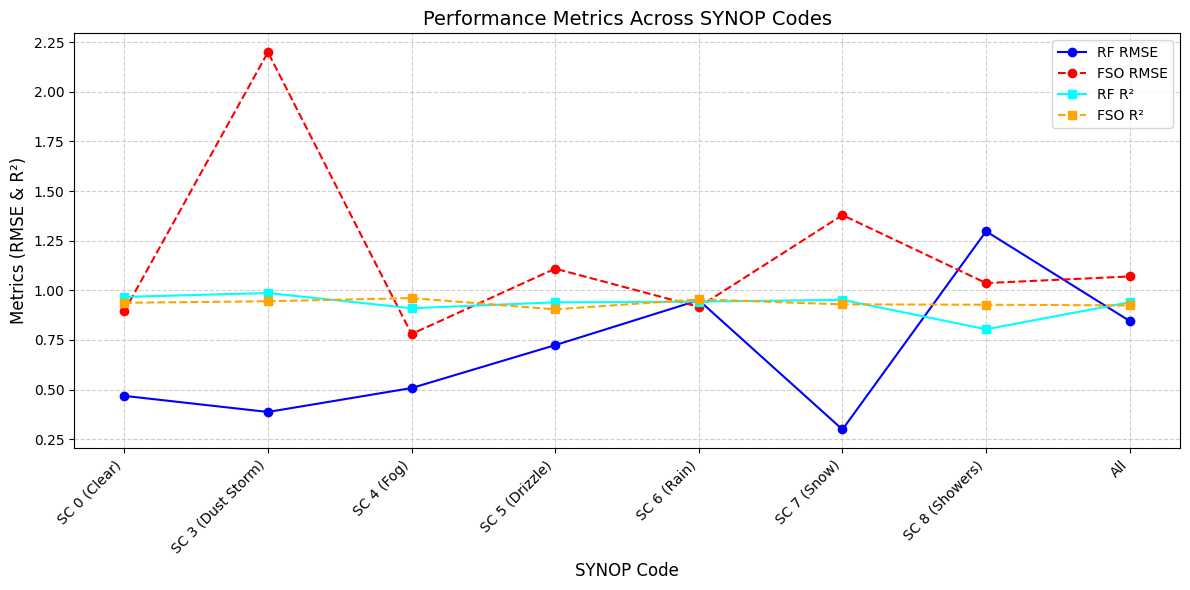

In [7]:
synop_codes = ['SC 0 (Clear)', 'SC 3 (Dust Storm)', 'SC 4 (Fog)', 'SC 5 (Drizzle)', 'SC 6 (Rain)', 'SC 7 (Snow)', 'SC 8 (Showers)', 'All']
rmse_rf = [0.4681, 0.3870, 0.5075, 0.7237, 0.9501, 0.2988, 1.2971, 0.8452]
r2_rf = [0.9666, 0.9861, 0.9095, 0.9392, 0.9428, 0.9518, 0.8036, 0.9397]
rmse_fso = [0.8943, 2.1992, 0.7795, 1.1089, 0.9162, 1.3786, 1.0362, 1.0696]
r2_fso = [0.9370, 0.9445, 0.9607, 0.9039, 0.9540, 0.9290, 0.9272, 0.9237]

x = np.arange(len(synop_codes))
fig, ax = plt.subplots(figsize=(12, 6))

# Line charts for RMSE
ax.plot(x, rmse_rf, marker='o', label='RF RMSE', color='blue', linestyle='-')
ax.plot(x, rmse_fso, marker='o', label='FSO RMSE', color='red', linestyle='--')

# Line charts for R²
ax.plot(x, r2_rf, marker='s', label='RF R²', color='cyan', linestyle='-')
ax.plot(x, r2_fso, marker='s', label='FSO R²', color='orange', linestyle='--')

# Customizations
ax.set_xticks(x)
ax.set_xticklabels(synop_codes, rotation=45, ha='right', fontsize=10)
ax.set_title('Performance Metrics Across SYNOP Codes', fontsize=14)
ax.set_xlabel('SYNOP Code', fontsize=12)
ax.set_ylabel('Metrics (RMSE & R²)', fontsize=12)
ax.legend(loc='best', fontsize=10)
ax.grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Hyperparameter Tuning for all the above models (RandomizedSearchCV) 

In [143]:
from sklearn.model_selection import                               thoses

def randomized_hp_tuning(data, important_features, target_column, n_iter=50):
    
    X = data[important_features]
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestRegressor(random_state=42)
    
    param_dist = {
        'n_estimators': [50, 100, 200, 300, 400],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    random_search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='neg_mean_squared_error',
        cv=3,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )
    
    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return random_search.best_params_, rmse, r2


In [146]:
# For RF All
best_params_rf, rmse, r2 = randomized_hp_tuning(
    data=new_data, 
    important_features=imp_rf_all, 
    target_column='RFL_Att'
)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 1.6min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 2.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=  18.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=  19.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  12.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  11.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time= 1.6min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 1.8min
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 1.9min
[CV] END max_depth=30, mi

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  48.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  48.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 2.0min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.7min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 1.8min
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 1.9min
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 1.9min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time= 2.6min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time= 2.4min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=400; 

NameError: name 'best_params' is not defined

In [148]:
print(' For RF All Best Hyperparameters:', best_params_rf)
print('Tuned RMSE:', rmse)
print('Tuned R^2:', r2)

 For RF All Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Tuned RMSE: 0.833954528421846
Tuned R^2: 0.941289917853367


In [149]:
# For FSO All
best_params_fso, rmse, r2 = randomized_hp_tuning(
    data=new_data, 
    important_features=imp_fso_all_sc, 
    target_column='FSO_Att'
)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 1.2min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 2.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=  28.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=  27.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  18.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  17.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time= 2.4min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 2.7min


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 2.4min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 2.8min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 2.5min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time= 2.4min
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 2.8min
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 2.7min
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 3.2min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time= 3.6min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 2.4min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; tota

In [150]:
print(' For FSO All Best Hyperparameters:', best_params_fso)
print('Tuned RMSE:', rmse)
print('Tuned R^2:', r2)

 For FSO All Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Tuned RMSE: 1.0649774007251542
Tuned R^2: 0.9244066953000972
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.0min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  53.8s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  56.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  51.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.9min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=  17.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=  17.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=  17.8s
[CV] END m

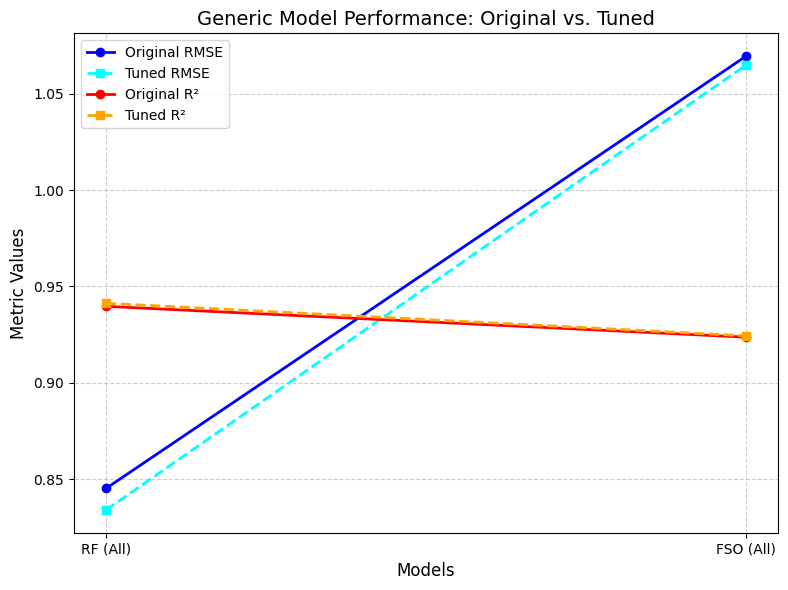

In [2]:
import matplotlib.pyplot as plt
import numpy as np

models = ['RF (All)', 'FSO (All)']
rmse_original = [0.8452, 1.0696]
r2_original = [0.9397, 0.9237]
rmse_tuned = [0.8340, 1.0650] 
r2_tuned = [0.9413, 0.9244]

plt.figure(figsize=(8, 6))
plt.plot(models, rmse_original, label='Original RMSE', marker='o', color='blue', linewidth=2)
plt.plot(models, rmse_tuned, label='Tuned RMSE', marker='s', color='cyan', linestyle='--', linewidth=2)

plt.plot(models, r2_original, label='Original R²', marker='o', color='red', linewidth=2)
plt.plot(models, r2_tuned, label='Tuned R²', marker='s', color='orange', linestyle='--', linewidth=2)

plt.title('Generic Model Performance: Original vs. Tuned', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Metric Values', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()